<a href="https://colab.research.google.com/github/PrayagRD/Online-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>
# Reference: https://github.com/PrayagRD/Online-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb

<p align="center">
  <img 
    src = "https://cdn.dribbble.com/users/506824/screenshots/1670206/media/71471d476effd234809de88eabd6229b.gif" width="1200" height="500"/>
</p>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df=pd.read_excel('Online Retail.xlsx')

In [3]:
#checking top 5 rows of dataset
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [4]:
#checking bottom 5 rows of dataset
# df.tail()

In [5]:
#checking shape of dataset
df.shape

(541909, 8)

In [6]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**As we can see we have mos tof null values in customerID and all other columns looks fine. we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense**

In [7]:
#columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## **Data Cleaning**

**Checking for null values**

In [8]:
#checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***Here we have null values present in our dataset like in CustomerID and Description.we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense***

In [9]:
#dropping null values
df.dropna(inplace=True)

In [10]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
#checking shape
df.shape

(406829, 8)

***After removing null value from our dataset.***

***Now we have 406829 rows and 8 columns in our dataset.***

In [13]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [14]:
df=df[~df['InvoiceNo'].str.contains('C')]

***Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.***

In [15]:
df.shape

(397924, 8)

In [16]:
#checking summary
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID  
count  397924.000000  
mean    15294.315171  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.169877

In [17]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[397924 rows x 8 columns]

# **Exploratory data analysis**

**Description Name**

In [18]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)

In [19]:
Description_df

Description  count
0     WHITE HANGING HEART T-LIGHT HOLDER   2028
1               REGENCY CAKESTAND 3 TIER   1724
2                JUMBO BAG RED RETROSPOT   1618
3          ASSORTED COLOUR BIRD ORNAMENT   1408
4                          PARTY BUNTING   1397
...                                  ...    ...
3872         RUBY GLASS CLUSTER EARRINGS      1
3873      PINK CHRYSANTHEMUMS ART FLOWER      1
3874     72 CAKE CASES VINTAGE CHRISTMAS      1
3875        WALL ART , THE MAGIC FOREST       1
3876         PAPER CRAFT , LITTLE BIRDIE      1

[3877 rows x 2 columns]

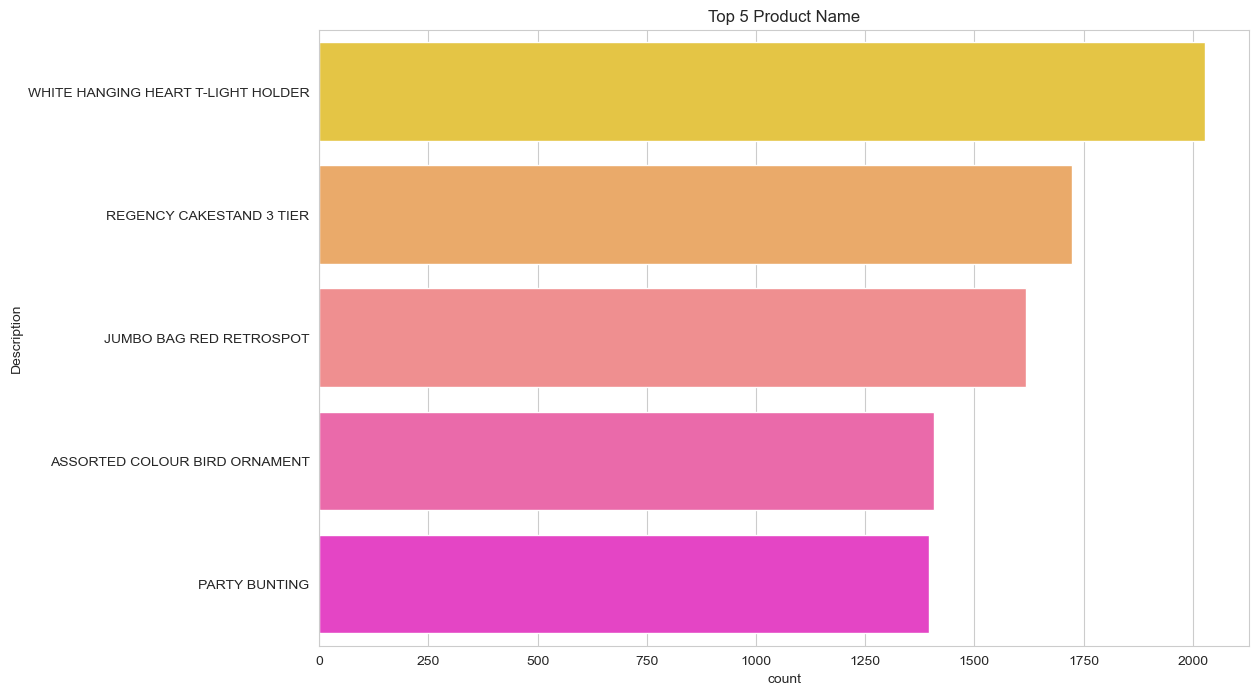

In [20]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='count',y='Description',data=Description_df[:5], palette='spring_r');

### **Top product based on maximum selling are :**
1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [21]:
#bottom 5 description name
Description_df.tail()

Description  count
3872      RUBY GLASS CLUSTER EARRINGS      1
3873   PINK CHRYSANTHEMUMS ART FLOWER      1
3874  72 CAKE CASES VINTAGE CHRISTMAS      1
3875     WALL ART , THE MAGIC FOREST       1
3876      PAPER CRAFT , LITTLE BIRDIE      1


### **Bottom 5 Product based on the selling are:**
1. RUBY GLASS CLUSTER EARRINGS

2. PINK CHRYSANTHEMUMS ART FLOWER

3. 72 CAKE CASES VINTAGE CHRISTMAS

4. WALL ART , THE MAGIC FOREST

5. PAPER CRAFT , LITTLE BIRDIE

**StockCode Name**

In [22]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
# StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df

StockCode  count
0       85123A   2035
1        22423   1724
2       85099B   1618
3        84879   1408
4        47566   1397
...        ...    ...
3660     90168      1
3661     90169      1
3662    90202A      1
3663     90118      1
3664     23843      1

[3665 rows x 2 columns]

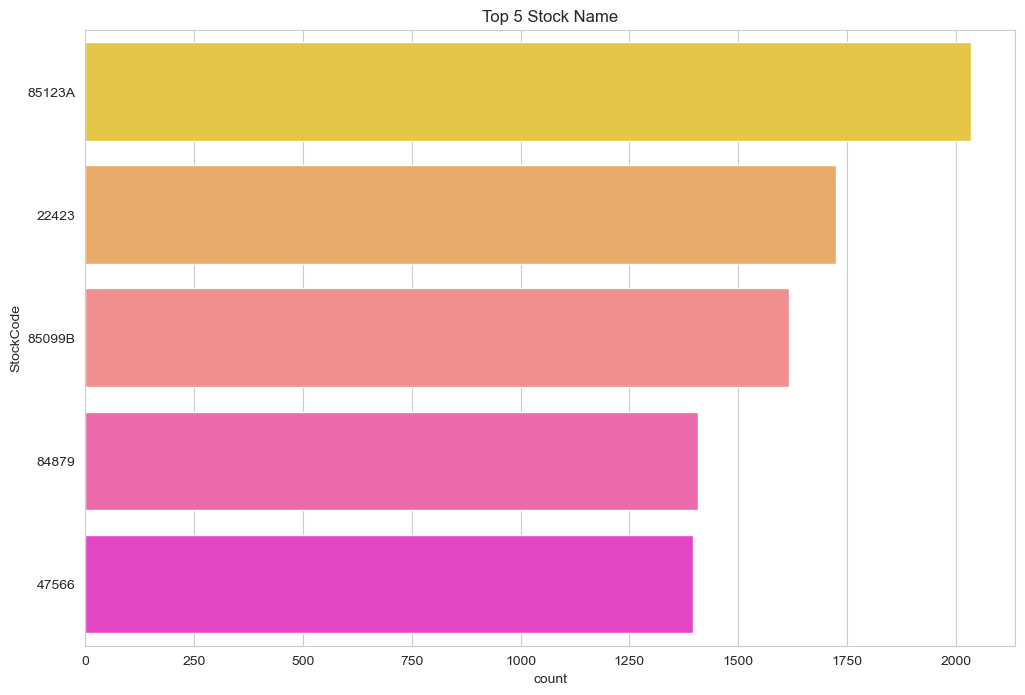

In [23]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='count',y='StockCode',data=StockCode_df[:5], palette='spring_r');

### **Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B 

4.84879

5.4756

In [24]:
#bottom 5 stockcode name
StockCode_df.tail()

StockCode  count
3660     90168      1
3661     90169      1
3662    90202A      1
3663     90118      1
3664     23843      1

**Country Name**

In [25]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
# country_df.rename(columns={'Country': 'Count'}, inplace=True)
#top 5 country name
country_df

Country   count
0         United Kingdom  354345
1                Germany    9042
2                 France    8342
3                   EIRE    7238
4                  Spain    2485
5            Netherlands    2363
6                Belgium    2031
7            Switzerland    1842
8               Portugal    1462
9              Australia    1185
10                Norway    1072
11                 Italy     758
12       Channel Islands     748
13               Finland     685
14                Cyprus     614
15                Sweden     451
16               Austria     398
17               Denmark     380
18                Poland     330
19                 Japan     321
20                Israel     248
21           Unspecified     244
22             Singapore     222
23               Iceland     182
24                   USA     179
25                Canada     151
26                Greece     145
27                 Malta     112
28  United Arab Emirates      68
29    European Community      60
30                   RSA      58
31               Lebanon      45
32             Lithuania      35
33                Brazil      32
34        Czech Republic      25
35               Bahrain      17
36          Saudi Arabia       9

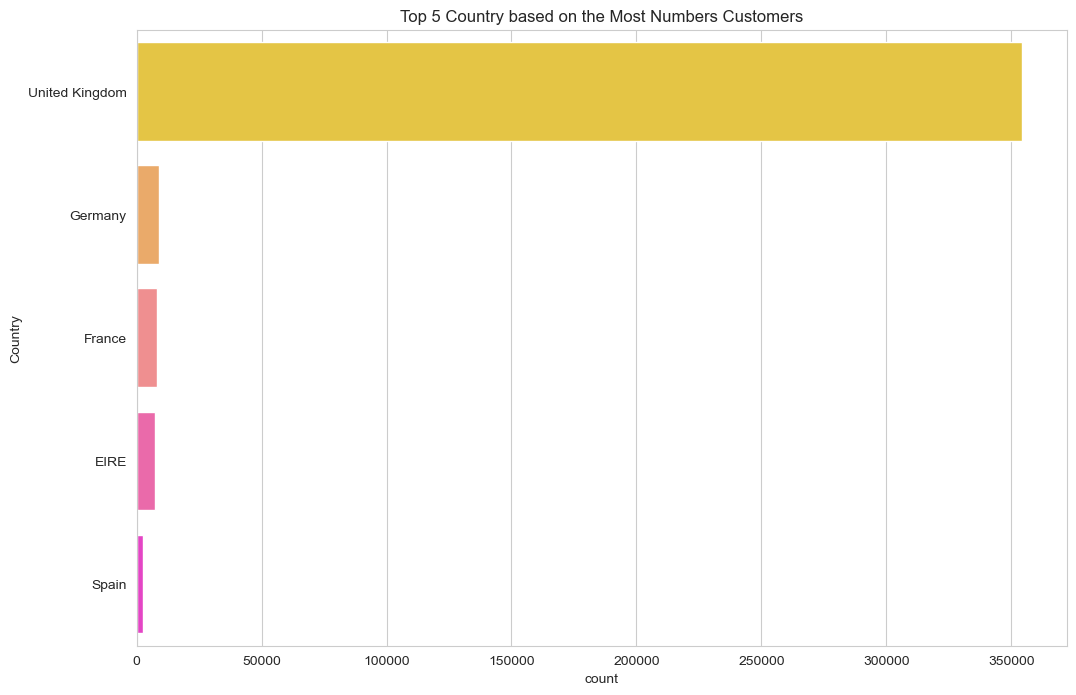

In [26]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='count',y='Country',data=country_df[:5], palette='spring_r');

***From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain***

In [27]:
#bottom 5 country name
country_df.tail()

Country  count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

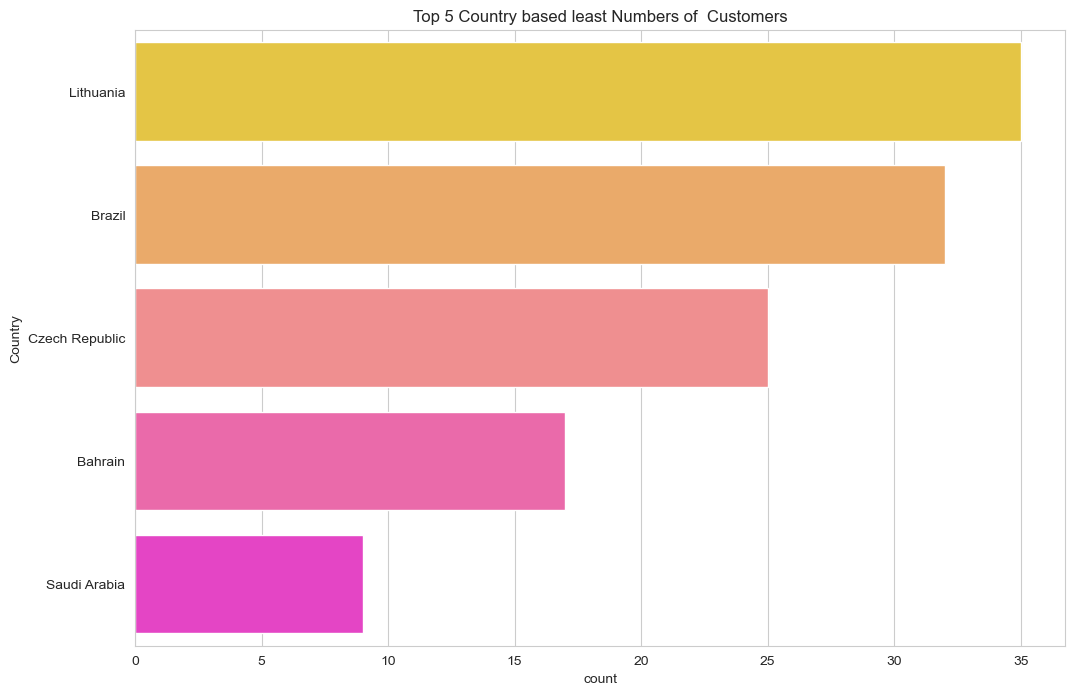

In [28]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='count',y='Country',data=country_df[-5:], palette='spring_r');

***From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia***

**Distribution of Quantity**

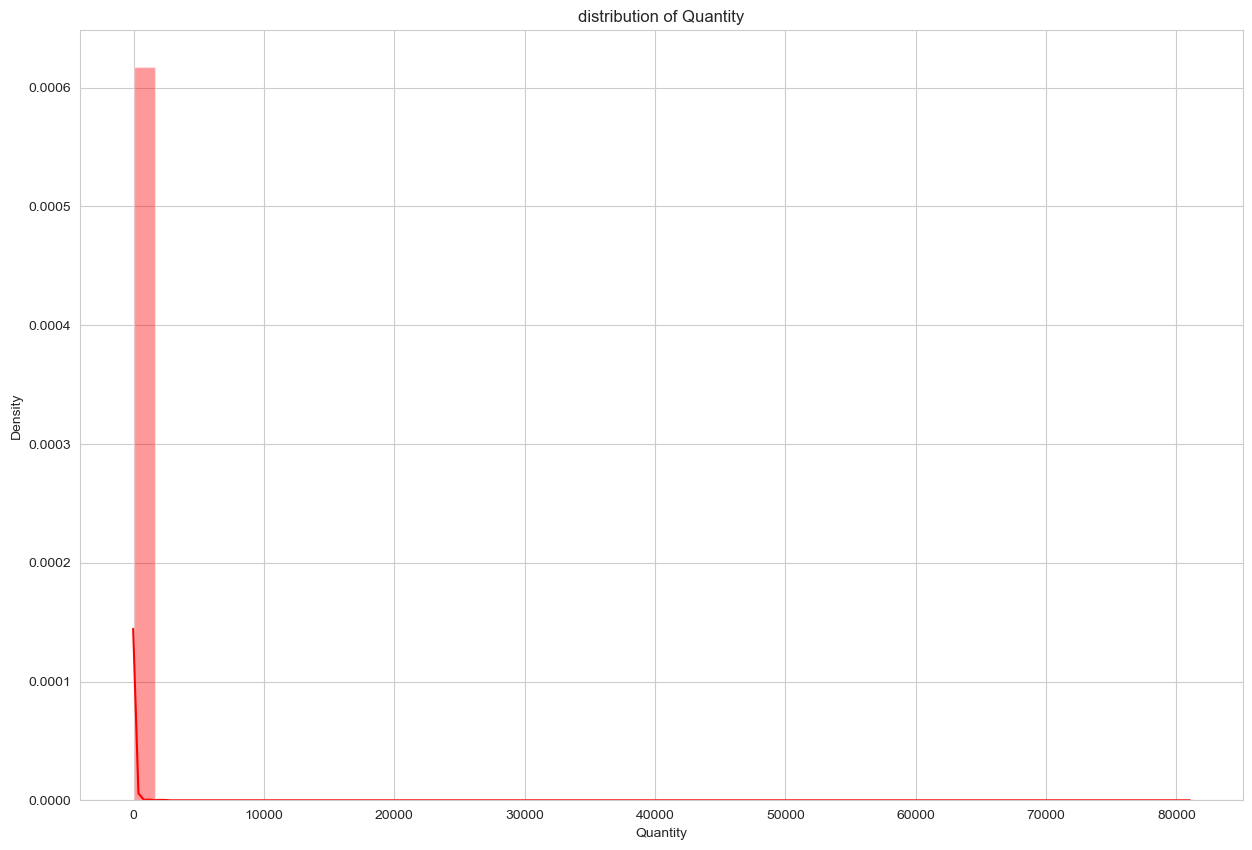

In [29]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

***Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution***

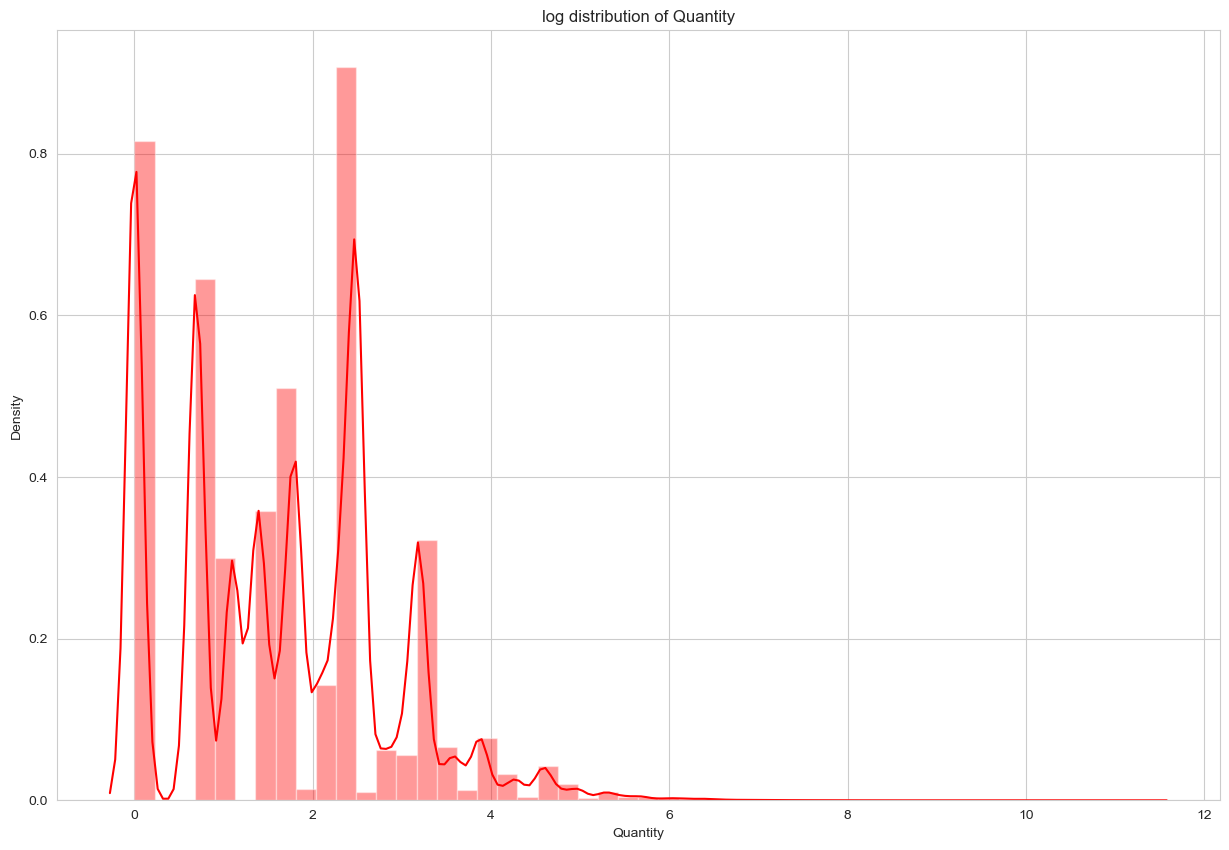

In [30]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

**Distribution of Unit Price**

<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

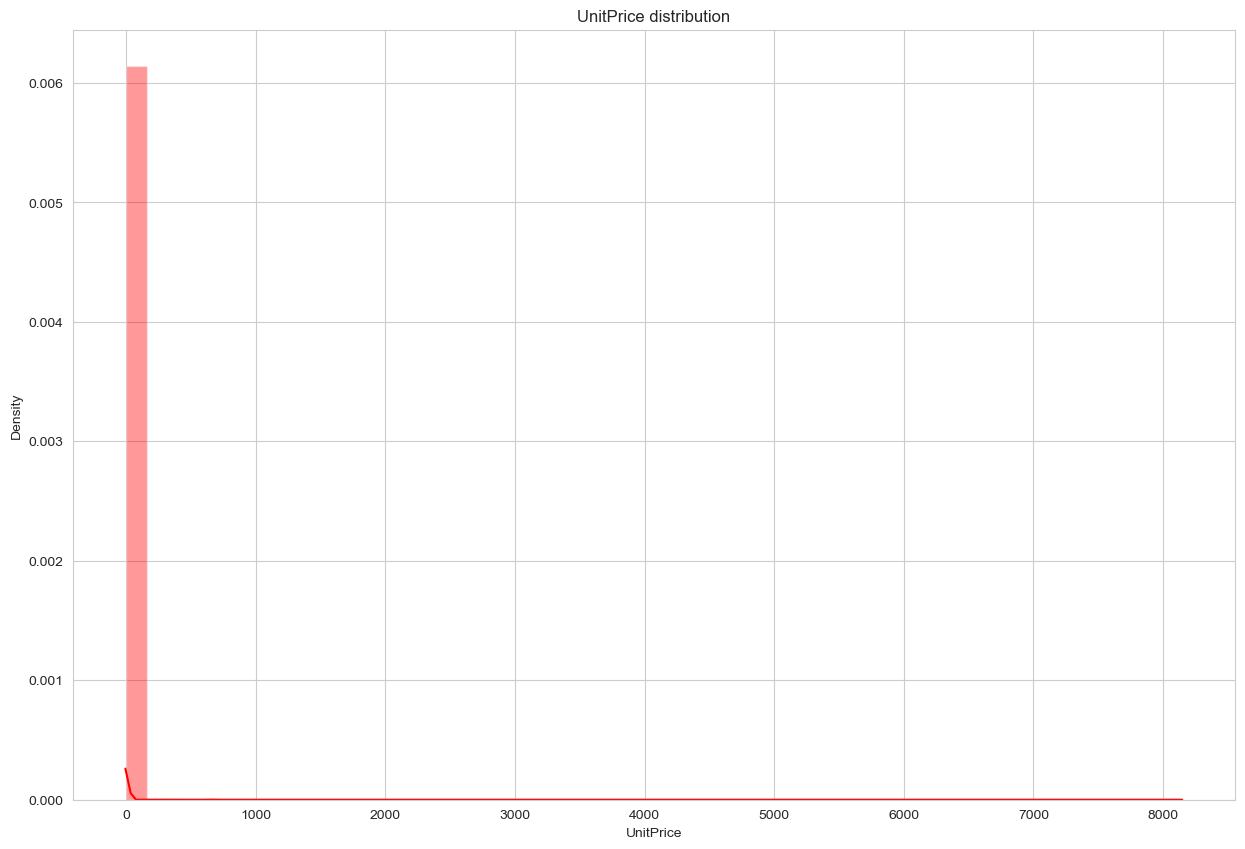

In [31]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

***From the distribution of unit price, we can say that most items have a lower price range.***

> Indented block



In [32]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

# **Feature engineering**

In [33]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [34]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [35]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [36]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France  December   
541905 2011-12-09 12:50:00       2.10     12680.0          France  December   
541906 2011-12-09 12:50:00       4.15     12680.0          France  December   
541907 2011-12-09 12:50:00       4.15     12680.0          France  December   
541908 2011-12-09 12:50:00       4.95     12680.0          France  December   

              Day  Hour  TotalAmount  
0       Wednesday     8        15.30  
1       Wednesday     8        20.34  
2       Wednesday     8        22.00  
3       Wednesday     8        20.34  
4       Wednesday     8        20.34  
...           ...   ...          ...  
541904     Friday    12        10.20  
541905     Friday    12        12.60  
541906     Friday    12        16.60  
541907     Friday    12        16.60  
541908     Friday    12        14.85  

[397924 rows x 12 columns]

**Distribution of total amount**

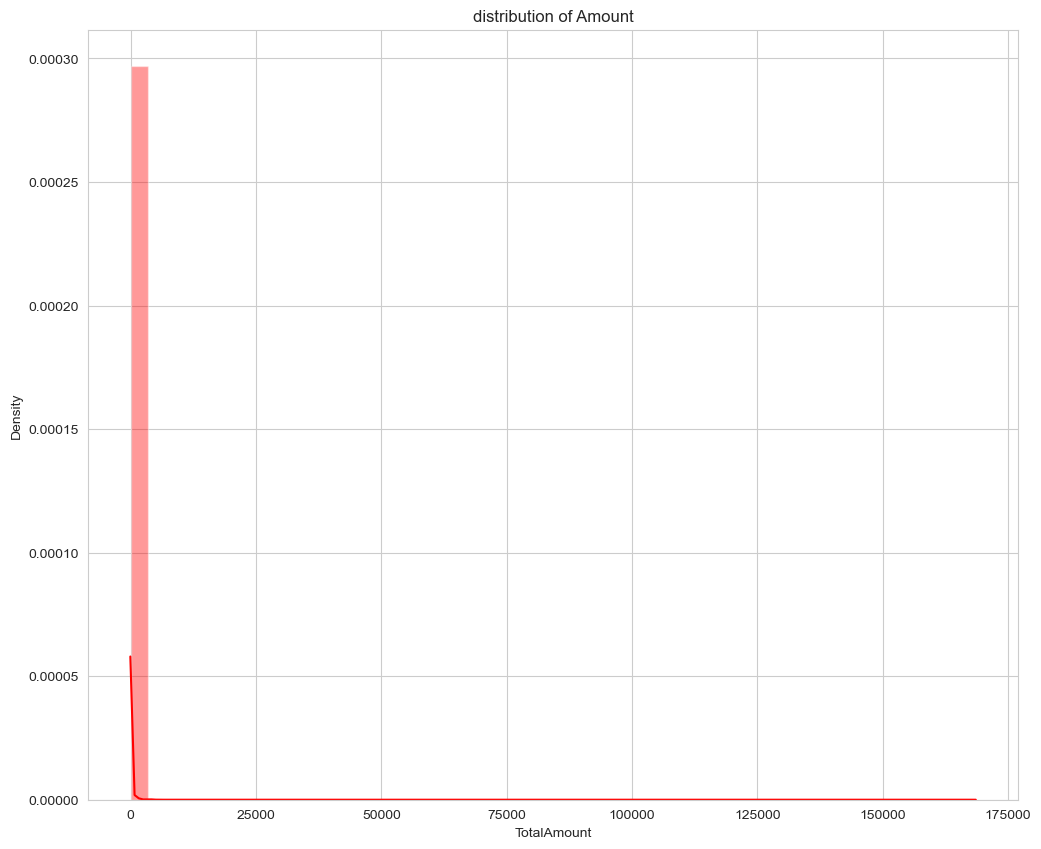

In [37]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

**Months**

In [38]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
# month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month  count
0    November  64545
1     October  49557
2    December  43464
3   September  40030
4         May  28322
5        June  27185
6       March  27177
7      August  27013
8        July  26827
9       April  22644
10    January  21232
11   February  19928

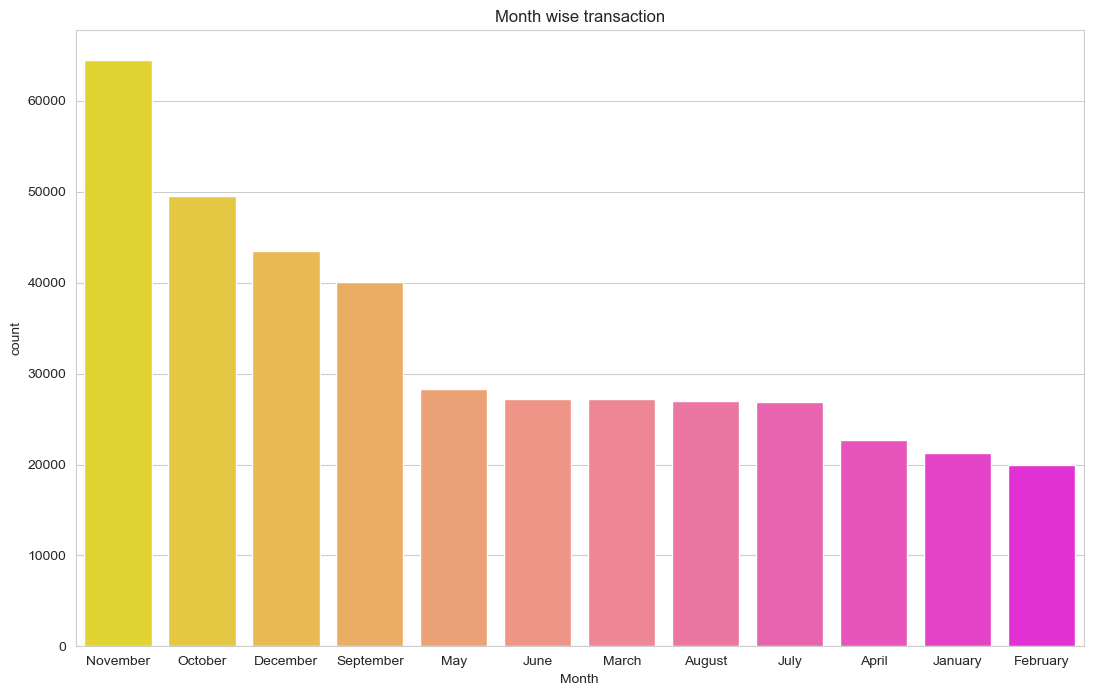

In [39]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month',y='count',data=month_df,palette='spring_r');

♦ ***Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.***

♦ ***Least numbers of purchasing are in the month of April and February.***

**Days**

In [40]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
# day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day  count
0   Thursday  80052
1  Wednesday  68888
2    Tuesday  66476
3     Monday  64899
4     Sunday  62775
5     Friday  54834

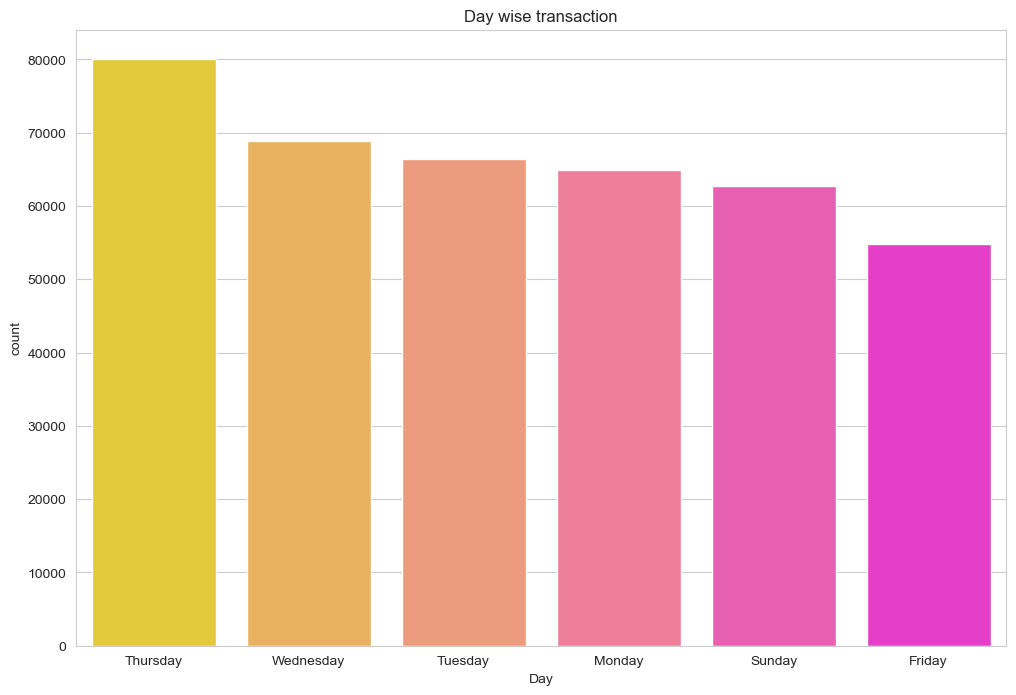

In [41]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day',y='count',data=day_df, palette='spring_r');

**We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.**

**Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.**

**Hour**

In [42]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
# hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

Hour  count
0     12  72069
1     13  64031
2     14  54127
3     11  49092
4     15  45372
5     10  37999
6     16  24093
7      9  21945
8     17  13072
9      8   8691
10    19   3322
11    18   2929
12    20    802
13     7    379
14     6      1

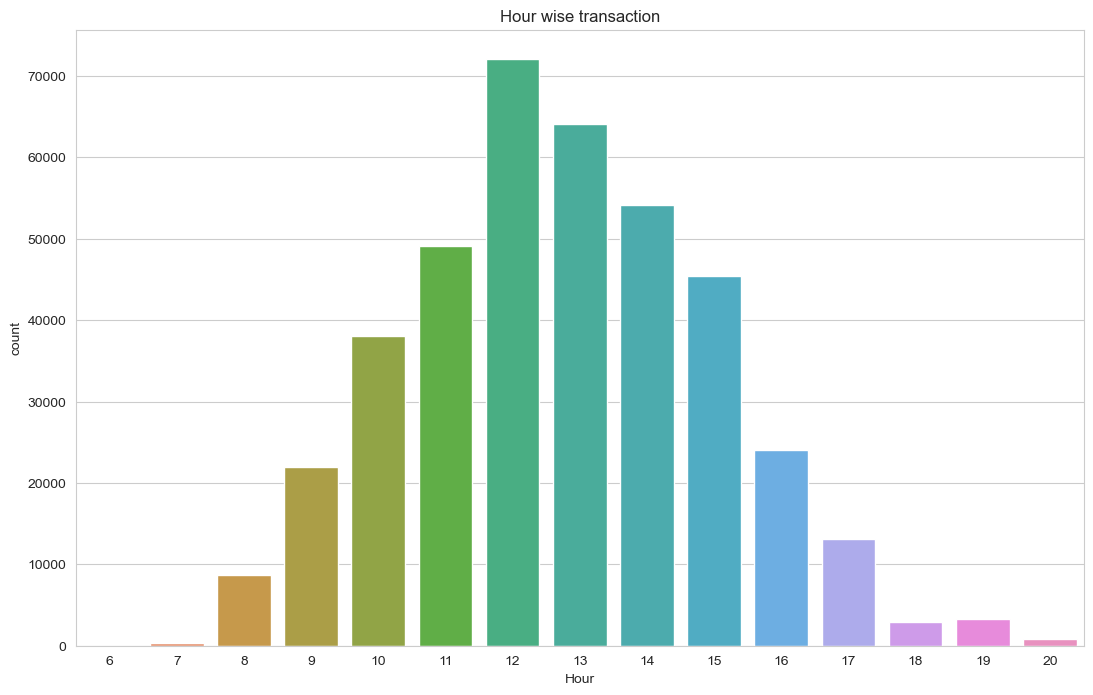

In [43]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hour',y='count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [44]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [45]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

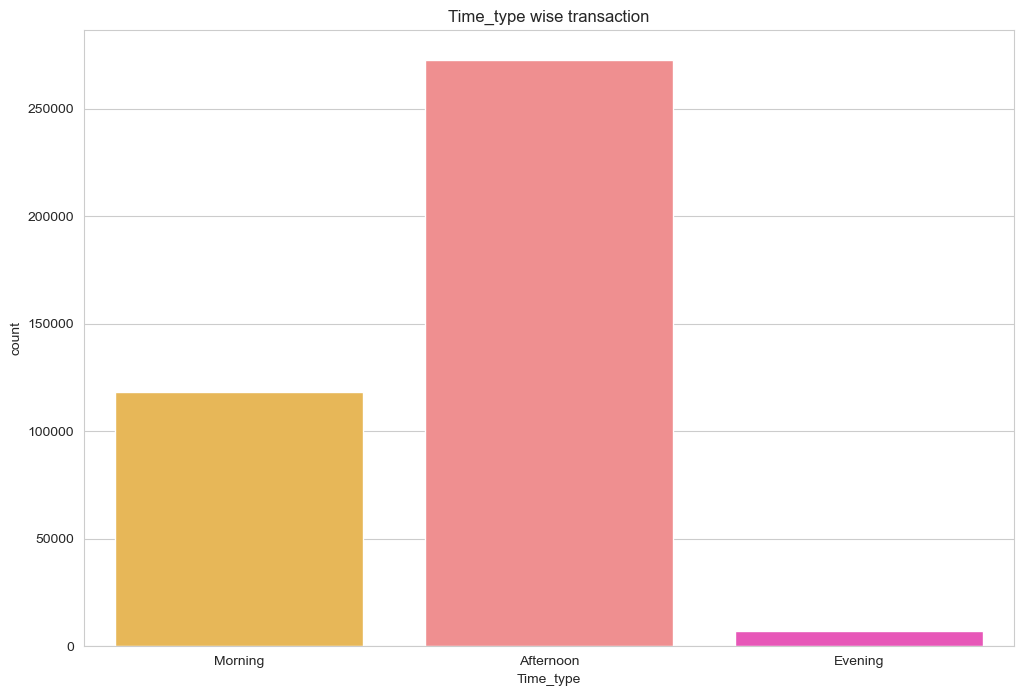

In [46]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='spring_r');

 ***Most of the customers have purchased the items in Afternoon.*** 

***Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening***

# **Create the RFM model (Recency, Frequency,Monetary value)**

### **RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.**

**RFM stands for the three dimensions:**

### **Recency – How recently did the customer purchase?**

### **Discount Rate – The more recent the purchase, the lower the discount rate.**

### **Frequency – How often do they purchase?**

### **Frequency_discount – How often do they purchase?(The product of discount rate and frequency)**

### **Monetary – How much do they spend?**

### **Monetary_discount – How often do they purchase?(The product of discount rate and monetary)**

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.
**Discount Rate** – The more recent the purchase, the lower the discount rate.
**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.
**Frequency_discount** – How often do they purchase?(The product of discount rate and frequency)**
**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.
**Monetary_discount** – How often do they purchase?(The product of discount rate and monetary)**

In [47]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [48]:
rfm_df

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          18         73   1757.55
12350.0         310         17    334.40
...             ...        ...       ...
18280.0         277         10    180.60
18281.0         180          7     80.82
18282.0           7         12    178.05
18283.0           3        756   2094.88
18287.0          42         70   1837.28

[4339 rows x 3 columns]

## **Calculate the discount rate**
**Discount Rate** – The more recent the purchase, the lower the discount rate.


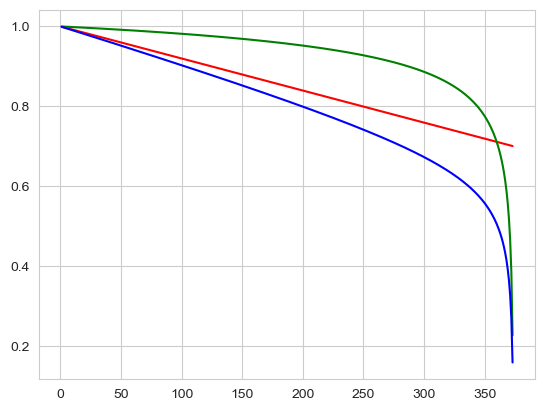

In [49]:
## **Calculate the discount rate**
##**Discount Rate** – The more recent the purchase, the lower the discount rate
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(1, 374, 1)
x1=0
y1=1
x2=374
y2=0.7
k=(y2 -y1)/(x2-x1)
k

plt.plot(x, (k * (x-x1) + y1)  , color='r') # line
plt.plot(x,1 - pow((1/(374-x)),1/4) + pow((1/(374-0)),1/4), color='g') # green curve
plt.plot(x, (k * (x-x1) + y1) * (1 - pow((1/(374-x)),1/4) + pow((1/(374-0)),1/4)) , color='b') #combined curve
plt.show()

In [50]:
rfm_df['discount']= (k * (rfm_df['Recency']-x1) + y1) * (1 - pow((1/(374-rfm_df['Recency'])),1/4) + pow((1/(374-0)),1/4))
rfm_df

rfm_df['Frequency_discount'] = rfm_df['Frequency']*rfm_df['discount']
rfm_df['Monetary_discount'] = rfm_df['Monetary']*rfm_df['discount']
#Convert Invoice Date into type int
rfm_df['discount'] = rfm_df['discount'].astype(float)
rfm_df['Frequency_discount'] = rfm_df['Frequency_discount'].astype(float)
rfm_df['Monetary_discount'] = rfm_df['Monetary_discount'].astype(float)

In [51]:
rfm_df

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12347.0           2        182   4310.00  0.998091          181.652596   
12348.0          75         31   1797.24  0.927541           28.753761   
12349.0          18         73   1757.55  0.982781           71.742998   
12350.0         310         17    334.40  0.656550           11.161349   
...             ...        ...       ...       ...                 ...   
18280.0         277         10    180.60  0.706833            7.068331   
18281.0         180          7     80.82  0.820918            5.746428   
18282.0           7         12    178.05  0.993314           11.919773   
18283.0           3        756   2094.88  0.997136          753.835102   
18287.0          42         70   1837.28  0.959668           67.176760   

            Monetary_discount  
CustomerID                     
12346.0          48470.416027  
12347.0           4301.773013  
12348.0           1667.013194  
12349.0           1727.286392  
12350.0            219.550291  
...                       ...  
18280.0            127.654051  
18281.0             66.346613  
18282.0            176.859634  
18283.0           2088.881057  
18287.0           1763.178830  

[4339 rows x 6 columns]

In [52]:
rfm_df.reset_index()

CustomerID  Recency  Frequency  Monetary  discount  Frequency_discount  \
0        12346.0      325          1  77183.60  0.627989            0.627989   
1        12347.0        2        182   4310.00  0.998091          181.652596   
2        12348.0       75         31   1797.24  0.927541           28.753761   
3        12349.0       18         73   1757.55  0.982781           71.742998   
4        12350.0      310         17    334.40  0.656550           11.161349   
...          ...      ...        ...       ...       ...                 ...   
4334     18280.0      277         10    180.60  0.706833            7.068331   
4335     18281.0      180          7     80.82  0.820918            5.746428   
4336     18282.0        7         12    178.05  0.993314           11.919773   
4337     18283.0        3        756   2094.88  0.997136          753.835102   
4338     18287.0       42         70   1837.28  0.959668           67.176760   

      Monetary_discount  
0          48470.416027  
1           4301.773013  
2           1667.013194  
3           1727.286392  
4            219.550291  
...                 ...  
4334         127.654051  
4335          66.346613  
4336         176.859634  
4337        2088.881057  
4338        1763.178830  

[4339 rows x 7 columns]

In [53]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

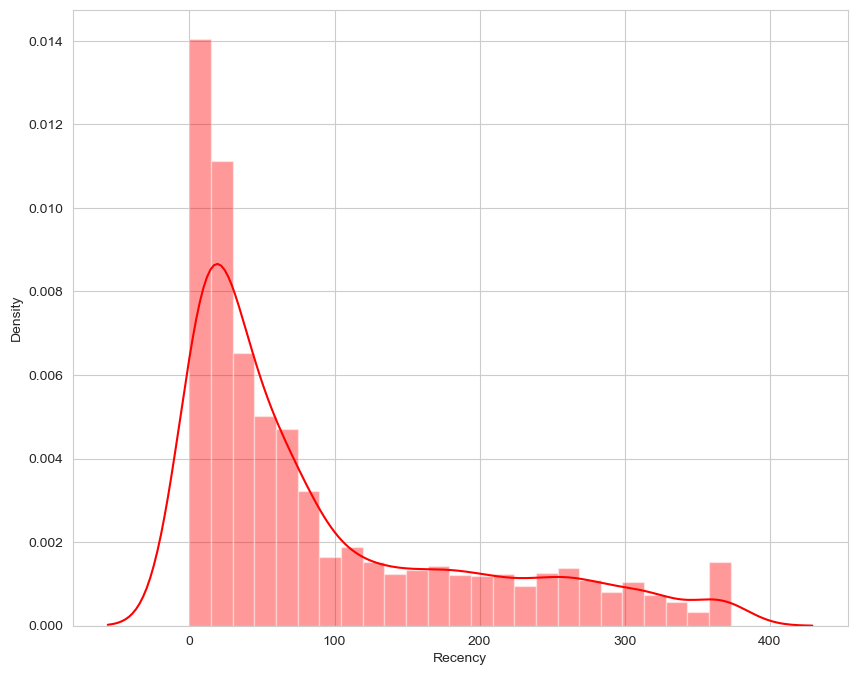

In [54]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [55]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

In [56]:
#Descriptive Statistics (Frequency_discount)
rfm_df.Frequency_discount.describe()

count    4339.000000
mean       87.841068
std       228.093183
min         0.159359
25%        14.244036
50%        37.236269
75%        95.358500
max      7839.511813
Name: Frequency_discount, dtype: float64

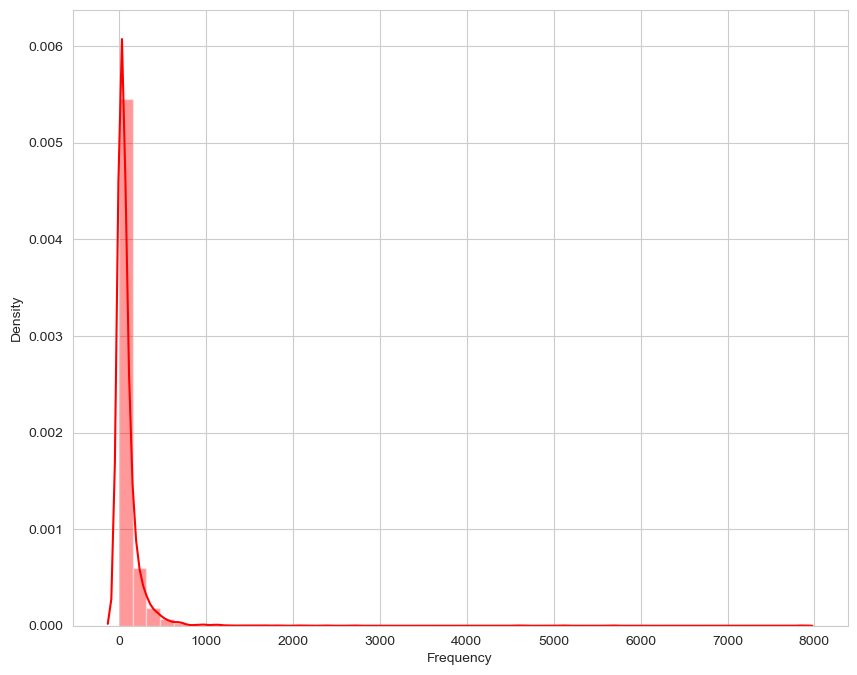

In [57]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

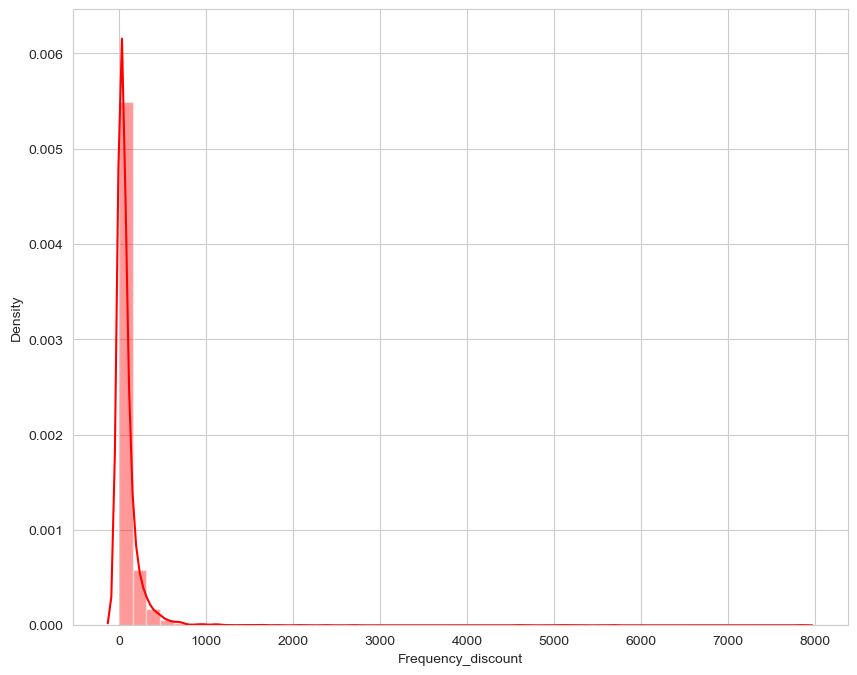

In [58]:
x = rfm_df['Frequency_discount']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [59]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

In [60]:
#Descriptive Statistics (Monetary_discount)
rfm_df.Monetary_discount.describe()

count      4339.000000
mean       1971.887837
std        8890.062008
min           0.000000
25%         253.444974
50%         620.586332
75%        1562.897976
max      279938.626722
Name: Monetary_discount, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

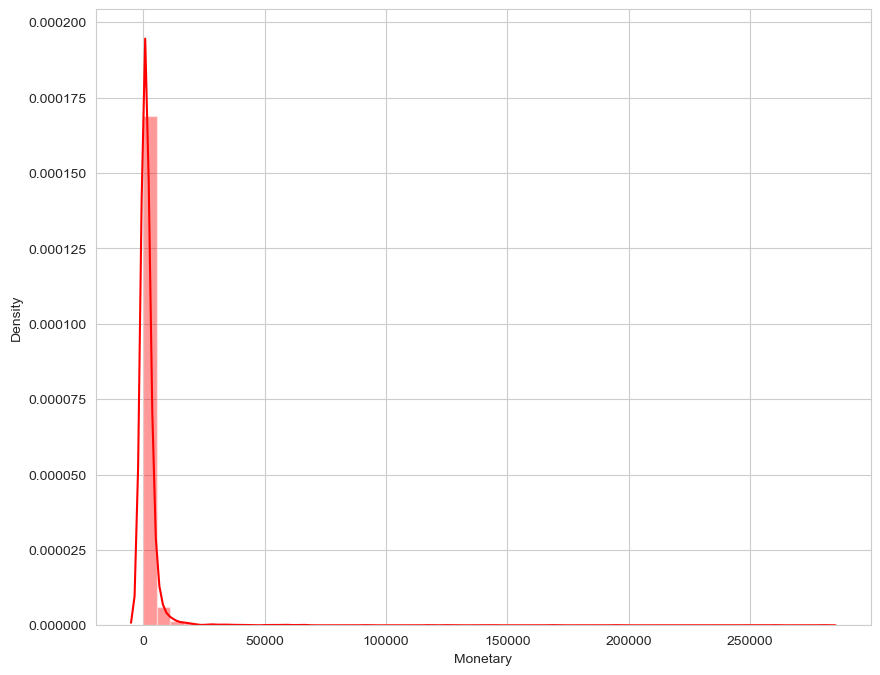

In [61]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

<Axes: xlabel='Monetary_discount', ylabel='Density'>

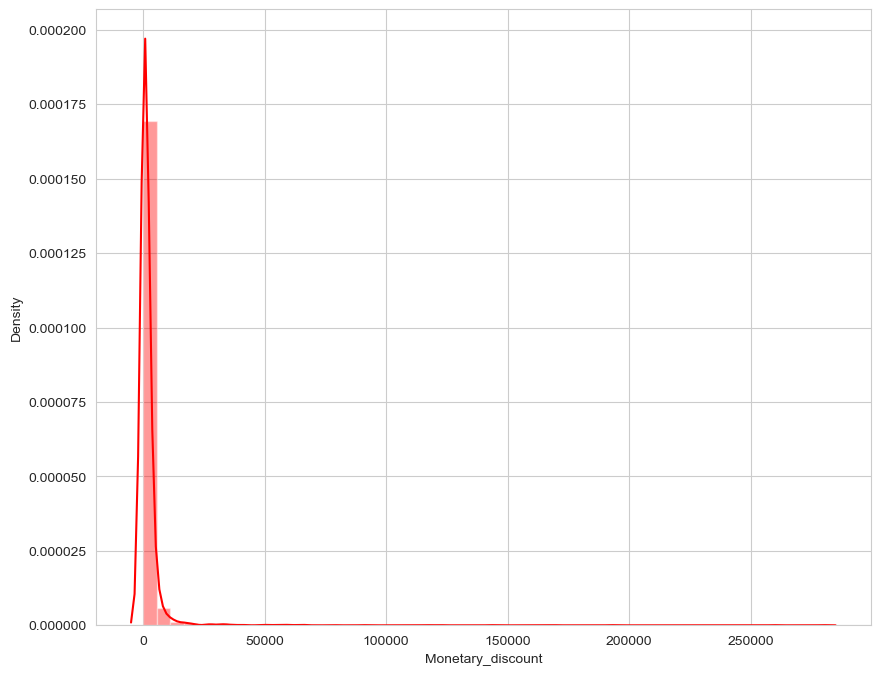

In [62]:
x = rfm_df['Monetary_discount']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***

## **Splitting into four segments using quantiles.**

In [63]:
rfm_df

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12347.0           2        182   4310.00  0.998091          181.652596   
12348.0          75         31   1797.24  0.927541           28.753761   
12349.0          18         73   1757.55  0.982781           71.742998   
12350.0         310         17    334.40  0.656550           11.161349   
...             ...        ...       ...       ...                 ...   
18280.0         277         10    180.60  0.706833            7.068331   
18281.0         180          7     80.82  0.820918            5.746428   
18282.0           7         12    178.05  0.993314           11.919773   
18283.0           3        756   2094.88  0.997136          753.835102   
18287.0          42         70   1837.28  0.959668           67.176760   

            Monetary_discount  
CustomerID                     
12346.0          48470.416027  
12347.0           4301.773013  
12348.0           1667.013194  
12349.0           1727.286392  
12350.0            219.550291  
...                       ...  
18280.0            127.654051  
18281.0             66.346613  
18282.0            176.859634  
18283.0           2088.881057  
18287.0           1763.178830  

[4339 rows x 6 columns]

In [64]:
rfm_df['discount'] = rfm_df['discount'].astype(float)
rfm_df['Frequency_discount'] = rfm_df['Frequency_discount'].astype(float)
rfm_df['Monetary_discount'] = rfm_df['Monetary_discount'].astype(float)
# rfm_df['F_d'] = rfm_df['F_d'].astype(int)
# rfm_df['M_d'] = rfm_df['M_d'].astype(int)
# rfm_df['F_d_M_d_Group'] = rfm_df['F_d_M_d_Group'].astype(int)
# rfm_df['F_d_M_d_Score'] = rfm_df['F_d_M_d_Score'].astype(int)

In [65]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])

In [66]:
quantiles

Recency  Frequency  Monetary  discount  Frequency_discount  \
0.25     17.0       17.0   307.245  0.861059           14.244036   
0.50     50.0       41.0   674.450  0.951920           37.236269   
0.75    141.5      100.0  1661.640  0.983740           95.358500   

      Monetary_discount  
0.25         253.444974  
0.50         620.586332  
0.75        1562.897976

In [67]:
quantiles = quantiles.to_dict()

In [68]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64},
 'discount': {0.25: 0.8610588705923856,
  0.5: 0.9519195638791205,
  0.75: 0.9837398595856175},
 'Frequency_discount': {0.25: 14.244036306196481,
  0.5: 37.23626860877358,
  0.75: 95.3585000935036},
 'Monetary_discount': {0.25: 253.4449741121477,
  0.5: 620.5863319152469,
  0.75: 1562.8979758352257}}

In [69]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4 #1
    elif x <= d[p][0.50]:
        return 3 #2
    elif x <= d[p][0.75]: 
        return 2 #3
    else:
        return 1 #4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1 #4
    elif x <= d[p][0.50]:
        return 2 #3
    elif x <= d[p][0.75]: 
        return 3 #2
    else:
        return 4 #1

In [70]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df['F_d'] = rfm_df['Frequency_discount'].apply(FnMScoring, args=('Frequency_discount',quantiles,))
rfm_df['M_d'] = rfm_df['Monetary_discount'].apply(FnMScoring, args=('Monetary_discount',quantiles,))
rfm_df

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12347.0           2        182   4310.00  0.998091          181.652596   
12348.0          75         31   1797.24  0.927541           28.753761   
12349.0          18         73   1757.55  0.982781           71.742998   
12350.0         310         17    334.40  0.656550           11.161349   
...             ...        ...       ...       ...                 ...   
18280.0         277         10    180.60  0.706833            7.068331   
18281.0         180          7     80.82  0.820918            5.746428   
18282.0           7         12    178.05  0.993314           11.919773   
18283.0           3        756   2094.88  0.997136          753.835102   
18287.0          42         70   1837.28  0.959668           67.176760   

            Monetary_discount  R  F  M  F_d  M_d  
CustomerID                                        
12346.0          48470.416027  1  1  4    1    4  
12347.0           4301.773013  4  4  4    4    4  
12348.0           1667.013194  2  2  4    2    4  
12349.0           1727.286392  3  3  4    3    4  
12350.0            219.550291  1  1  2    1    1  
...                       ... .. .. ..  ...  ...  
18280.0            127.654051  1  1  1    1    1  
18281.0             66.346613  1  1  1    1    1  
18282.0            176.859634  4  1  1    1    1  
18283.0           2088.881057  4  4  4    4    4  
18287.0           1763.178830  3  3  4    3    4  

[4339 rows x 11 columns]

In [71]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)
rfm_df['F_d_M_d_Group'] =  rfm_df.F_d.map(str) + rfm_df.M_d.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df['F_d_M_d_Score'] =  rfm_df[['F_d', 'M_d']].sum(axis = 1)

rfm_df

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12347.0           2        182   4310.00  0.998091          181.652596   
12348.0          75         31   1797.24  0.927541           28.753761   
12349.0          18         73   1757.55  0.982781           71.742998   
12350.0         310         17    334.40  0.656550           11.161349   
...             ...        ...       ...       ...                 ...   
18280.0         277         10    180.60  0.706833            7.068331   
18281.0         180          7     80.82  0.820918            5.746428   
18282.0           7         12    178.05  0.993314           11.919773   
18283.0           3        756   2094.88  0.997136          753.835102   
18287.0          42         70   1837.28  0.959668           67.176760   

            Monetary_discount  R  F  M  F_d  M_d RFMGroup F_d_M_d_Group  \
CustomerID                                                                
12346.0          48470.416027  1  1  4    1    4      114            14   
12347.0           4301.773013  4  4  4    4    4      444            44   
12348.0           1667.013194  2  2  4    2    4      224            24   
12349.0           1727.286392  3  3  4    3    4      334            34   
12350.0            219.550291  1  1  2    1    1      112            11   
...                       ... .. .. ..  ...  ...      ...           ...   
18280.0            127.654051  1  1  1    1    1      111            11   
18281.0             66.346613  1  1  1    1    1      111            11   
18282.0            176.859634  4  1  1    1    1      411            11   
18283.0           2088.881057  4  4  4    4    4      444            44   
18287.0           1763.178830  3  3  4    3    4      334            34   

            RFMScore  F_d_M_d_Score  
CustomerID                           
12346.0            6              5  
12347.0           12              8  
12348.0            8              6  
12349.0           10              7  
12350.0            4              2  
...              ...            ...  
18280.0            3              2  
18281.0            3              2  
18282.0            6              2  
18283.0           12              8  
18287.0           10              7  

[4339 rows x 15 columns]

## **The relationship between RFMScore and F_d_M_d_Score.**

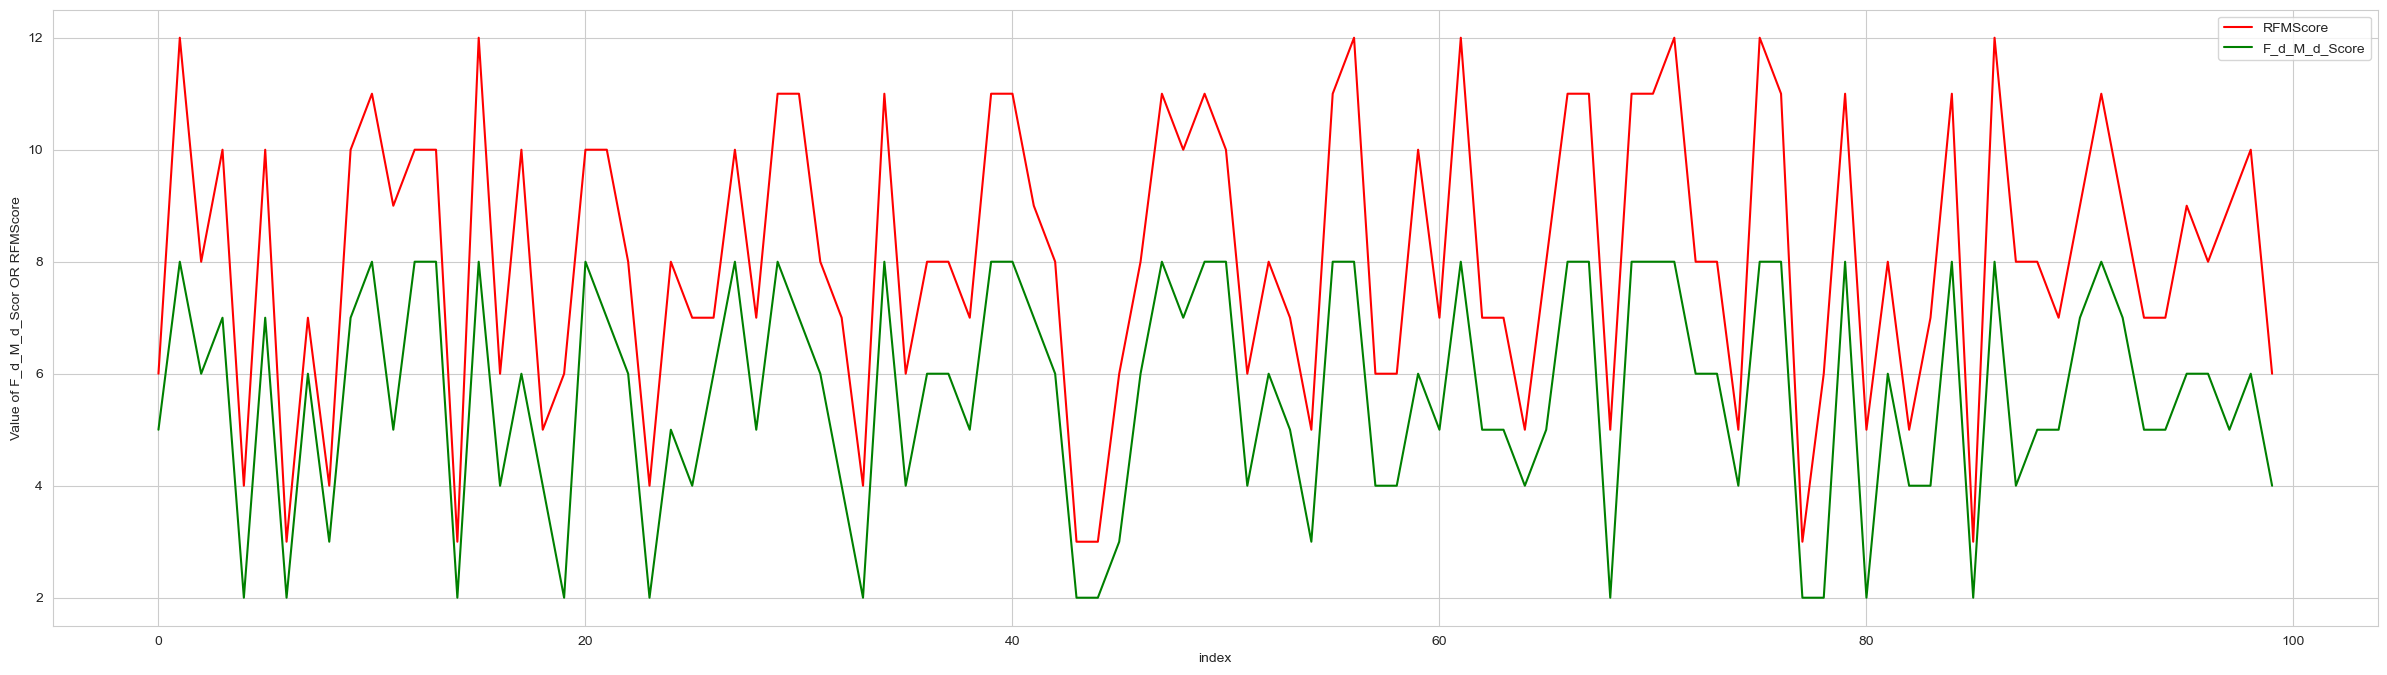

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(0, 100, 1)
plt.figure(figsize=(30,8))
plt.plot(x, rfm_df['RFMScore'].head(100)  , color='r',label="RFMScore") # line
plt.plot(x,rfm_df['F_d_M_d_Score'].head(100), color='g',label='F_d_M_d_Score') # green curve
plt.xlabel('index')
plt.ylabel('Value of F_d_M_d_Scor OR RFMScore')
plt.legend()
plt.show()

In [73]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]
rfm_df['Frequency_discount'] = [handle_neg_n_zero(x) for x in rfm_df.Frequency_discount]
rfm_df['Monetary_discount'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary_discount]
#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary', 'Frequency_discount', 'Monetary_discount']].apply(np.log, axis = 1).round(3)

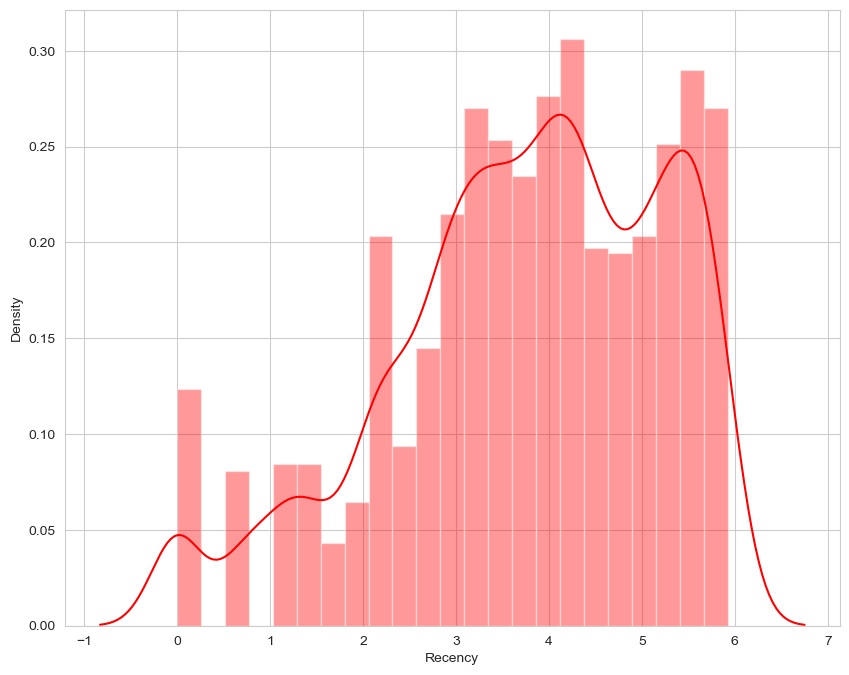

In [74]:
#Data distribution after data normalization for Recency
Recency_Plot_Log = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot_Log,color='r');

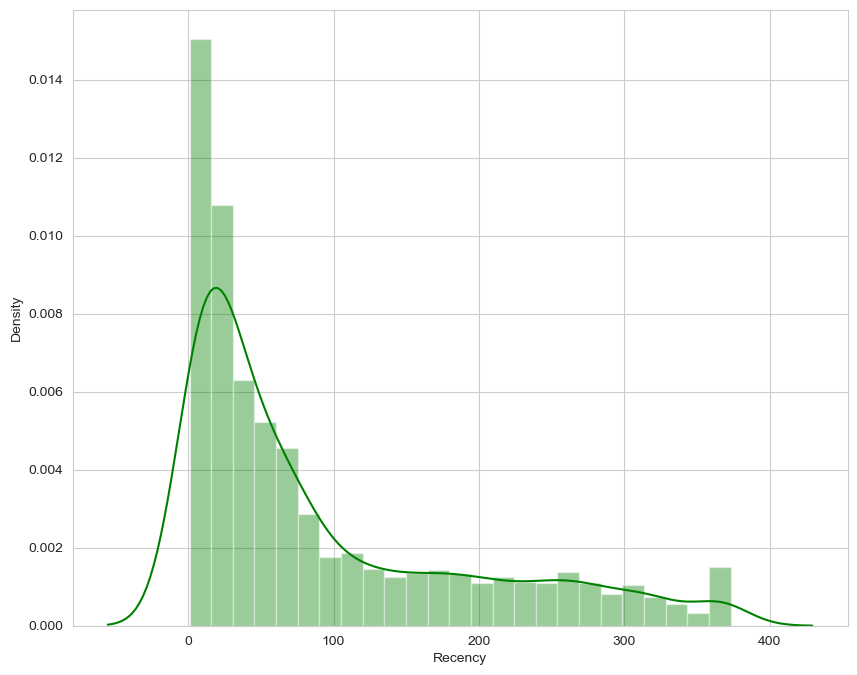

In [75]:
#Data distribution after data normalization for Recency
Recency_Plot = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='g');

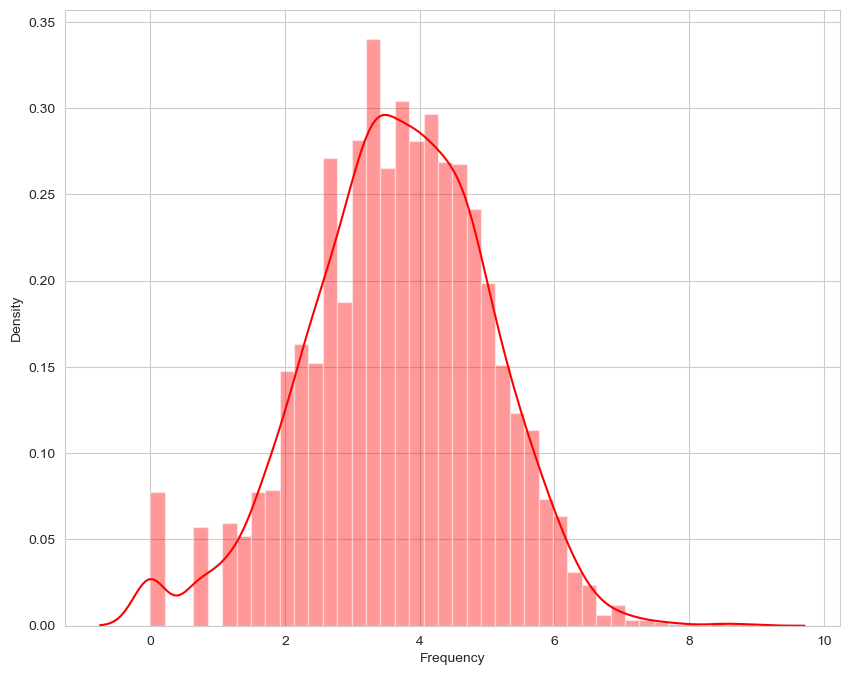

In [76]:
#Data distribution after data normalization for Frequency
Frequency_Plot_Log = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot_Log,color='r');

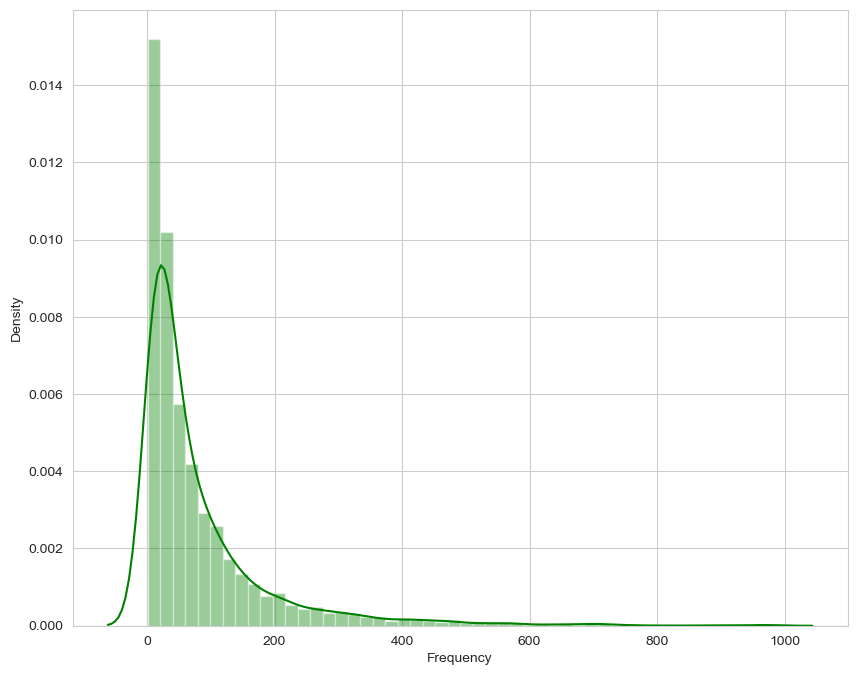

In [77]:
#Data distribution after data normalization for Frequency
Frequency_Plot = rfm_df.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='g');

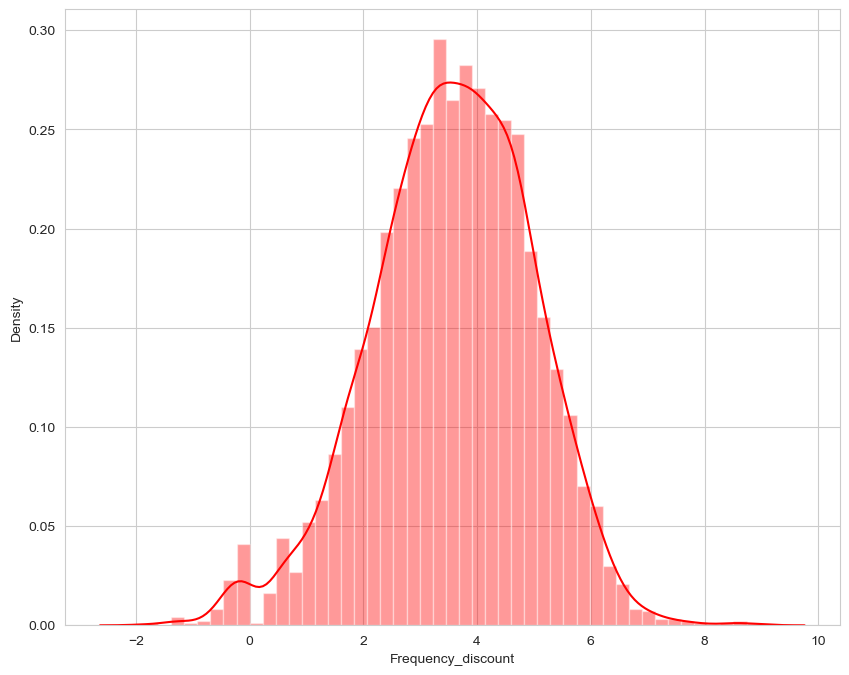

In [78]:
#Data distribution after data normalization for Frequency_discount
Frequency_Plot_Log = Log_Tfd_Data.query('Frequency_discount < 1000')['Frequency_discount']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot_Log,color='r');

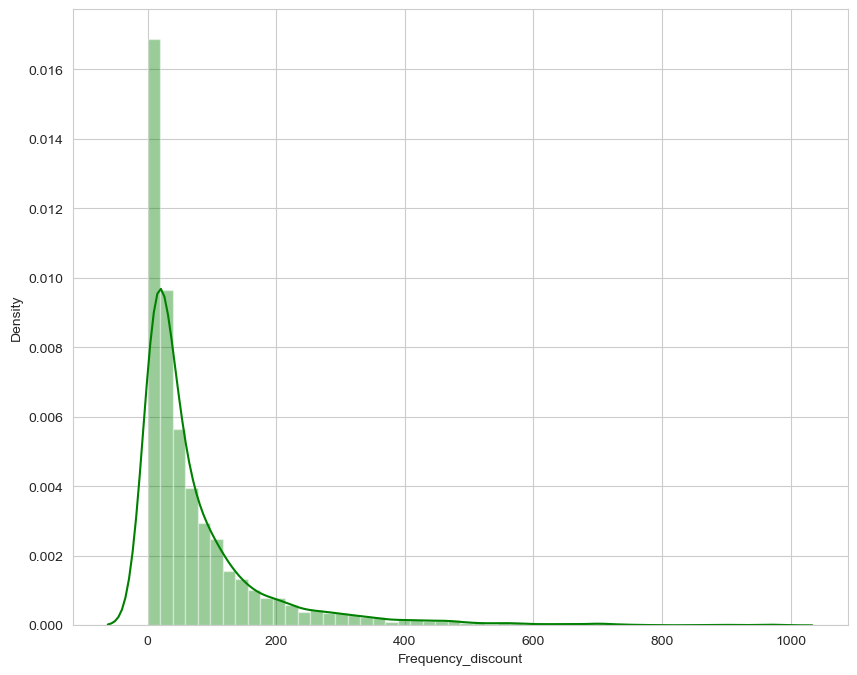

In [79]:
#Data distribution after data normalization for Frequency_discount
Frequency_Plot = rfm_df.query('Frequency_discount < 1000')['Frequency_discount']
plt.figure(figsize=(10, 8))
sns.distplot(Frequency_Plot, color='g');

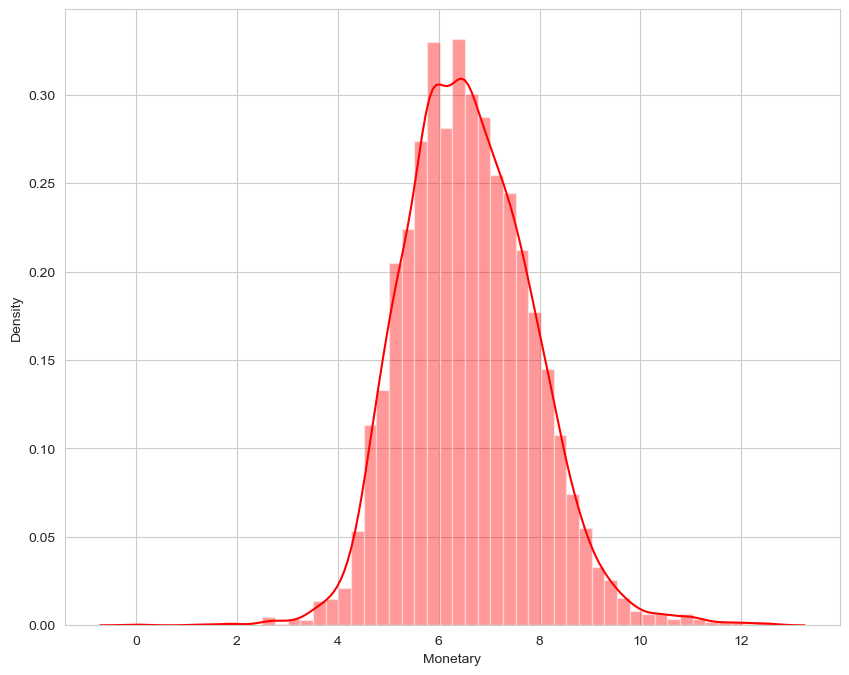

In [80]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

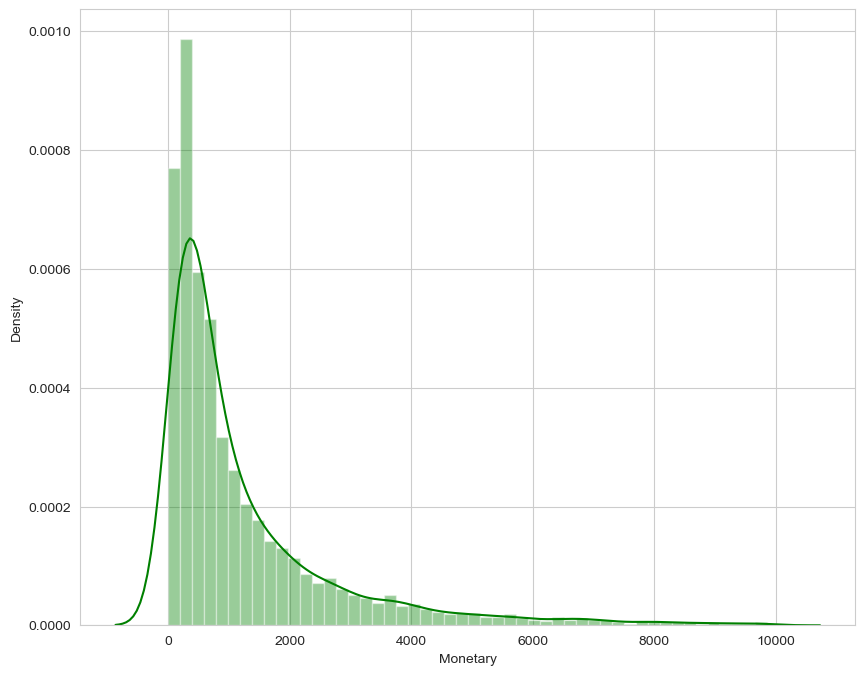

In [81]:
#Data distribution after data normalization for Monetary
Monetary_Plot = rfm_df.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='g');

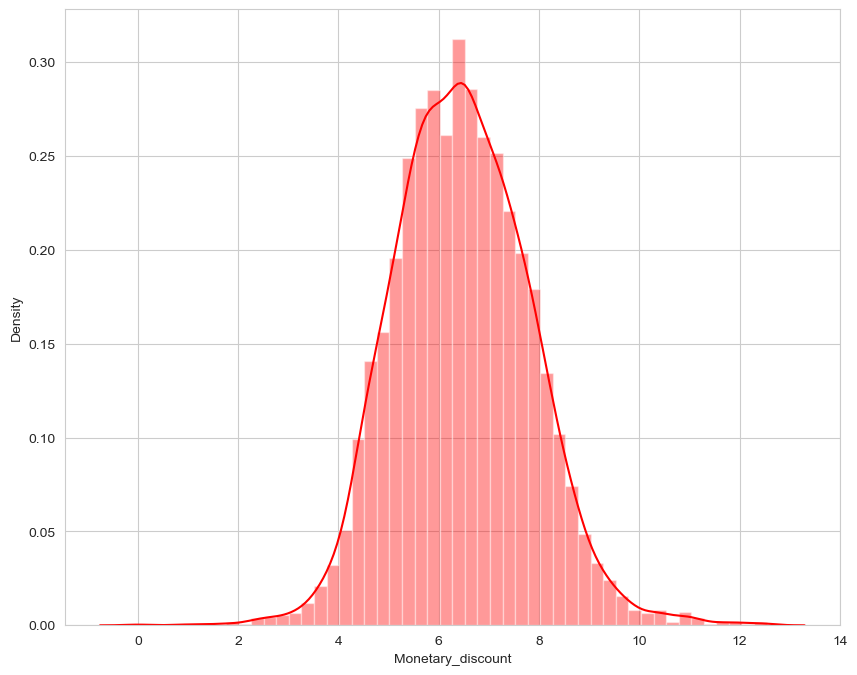

In [82]:
#Data distribution after data normalization for Monetary_discount
Monetary_Plot_log = Log_Tfd_Data.query('Monetary_discount < 10000')['Monetary_discount']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot_log,color='r');

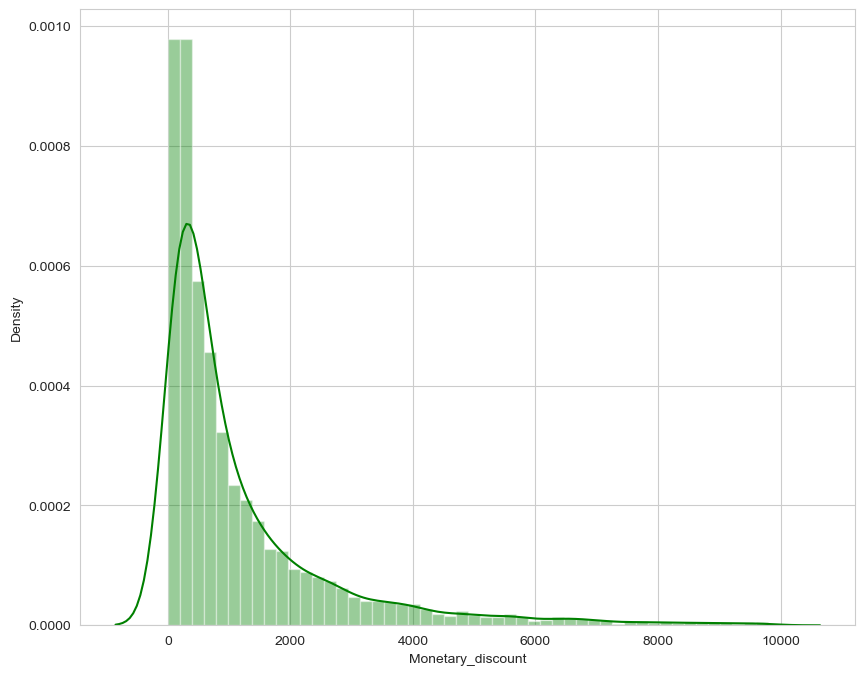

In [83]:
#Data distribution after data normalization for Monetary_discount
Monetary_Plot = rfm_df.query('Monetary_discount < 10000')['Monetary_discount']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='g');

***As we can see from the above plots, skewness has been removed from the data.***



In [84]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)
rfm_df['Frequency_discount_log'] = rfm_df['Frequency_discount'].apply(math.log)
rfm_df['Monetary_discount_log'] = rfm_df['Monetary_discount'].apply(math.log)

In [85]:
rfm_df

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12347.0           2        182   4310.00  0.998091          181.652596   
12348.0          75         31   1797.24  0.927541           28.753761   
12349.0          18         73   1757.55  0.982781           71.742998   
12350.0         310         17    334.40  0.656550           11.161349   
...             ...        ...       ...       ...                 ...   
18280.0         277         10    180.60  0.706833            7.068331   
18281.0         180          7     80.82  0.820918            5.746428   
18282.0           7         12    178.05  0.993314           11.919773   
18283.0           3        756   2094.88  0.997136          753.835102   
18287.0          42         70   1837.28  0.959668           67.176760   

            Monetary_discount  R  F  M  F_d  M_d RFMGroup F_d_M_d_Group  \
CustomerID                                                                
12346.0          48470.416027  1  1  4    1    4      114            14   
12347.0           4301.773013  4  4  4    4    4      444            44   
12348.0           1667.013194  2  2  4    2    4      224            24   
12349.0           1727.286392  3  3  4    3    4      334            34   
12350.0            219.550291  1  1  2    1    1      112            11   
...                       ... .. .. ..  ...  ...      ...           ...   
18280.0            127.654051  1  1  1    1    1      111            11   
18281.0             66.346613  1  1  1    1    1      111            11   
18282.0            176.859634  4  1  1    1    1      411            11   
18283.0           2088.881057  4  4  4    4    4      444            44   
18287.0           1763.178830  3  3  4    3    4      334            34   

            RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                                      
12346.0            6              5     5.783825       0.000000     11.253942   
12347.0           12              8     0.693147       5.204007      8.368693   
12348.0            8              6     4.317488       3.433987      7.494007   
12349.0           10              7     2.890372       4.290459      7.471676   
12350.0            4              2     5.736572       2.833213      5.812338   
...              ...            ...          ...            ...           ...   
18280.0            3              2     5.624018       2.302585      5.196285   
18281.0            3              2     5.192957       1.945910      4.392224   
18282.0            6              2     1.945910       2.484907      5.182064   
18283.0           12              8     1.098612       6.628041      7.647252   
18287.0           10              7     3.737670       4.248495      7.516041   

            Frequency_discount_log  Monetary_discount_log  
CustomerID                                                 
12346.0                  -0.465233              10.788709  
12347.0                   5.202096               8.366783  
12348.0                   3.358769               7.418789  
12349.0                   4.273090               7.454307  
12350.0                   2.412457               5.391581  
...                            ...                    ...  
18280.0                   1.955624               4.849324  
18281.0                   1.748578               4.194893  
18282.0                   2.478199               5.175356  
18283.0                   6.625174               7.644384  
18287.0                   4.207327               7.474874  

[4339 rows x 20 columns]

# **Clustering**

### **K-Means Clustering**

**Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.**

**KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.**

In [86]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### **Silhouette score method:**

**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.**

## **Applying Silhouette Score Method on Frequency_discount and Monetary_discount**

In [87]:
#silhoutte score
features_F_d_log_M_d_log=['Frequency_discount_log','Monetary_discount_log']
X_features_F_d_log_M_d_log=rfm_df[features_F_d_log_M_d_log].values
scaler_F_d_log_M_d_log=preprocessing.StandardScaler()
X_F_d_log_M_d_log=scaler_F_d_log_M_d_log.fit_transform(X_features_F_d_log_M_d_log)
X=X_F_d_log_M_d_log
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.48377603893966836
For n_clusters = 3, silhouette score is 0.41662556066500456
For n_clusters = 4, silhouette score is 0.38098803230455275
For n_clusters = 5, silhouette score is 0.35456877273457105
For n_clusters = 6, silhouette score is 0.36766777151067154
For n_clusters = 7, silhouette score is 0.35167504454875764
For n_clusters = 8, silhouette score is 0.32837670585389345
For n_clusters = 9, silhouette score is 0.34683824618966025
For n_clusters = 10, silhouette score is 0.3317873915205686
For n_clusters = 11, silhouette score is 0.3423938132918034
For n_clusters = 12, silhouette score is 0.3564738870411324
For n_clusters = 13, silhouette score is 0.3407886836006901
For n_clusters = 14, silhouette score is 0.3477593519303862
For n_clusters = 15, silhouette score is 0.359300662514394


### **Elbow Method:**

**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.**

## **Applying Elbow Method on Frequency_discount and Monetary_discount**

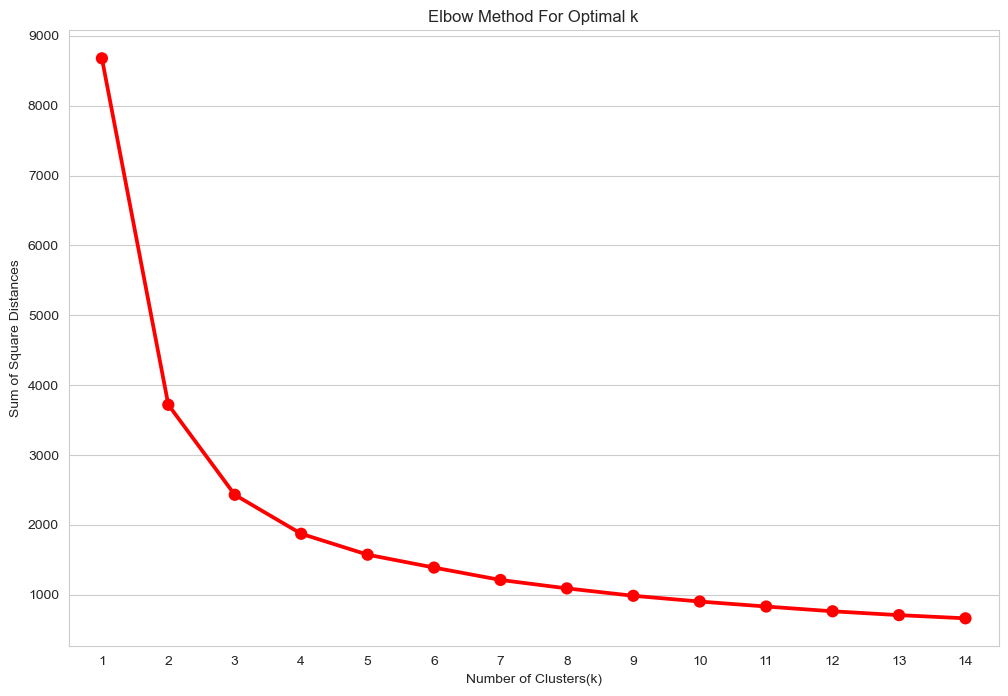

In [88]:
#applying elbow method
features_F_d_log_M_d_log=['Frequency_discount_log','Monetary_discount_log']
X_features_F_d_log_M_d_log=rfm_df[features_F_d_log_M_d_log].values
scaler_F_d_log_M_d_log=preprocessing.StandardScaler()
X_F_d_log_M_d_log=scaler_F_d_log_M_d_log.fit_transform(X_features_F_d_log_M_d_log)
X=X_F_d_log_M_d_log

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [89]:
X

array([[-2.85809628,  3.21139473],
       [ 1.16749147,  1.41101418],
       [-0.14185125,  0.70630675],
       ...,
       [-0.76733308, -0.96138725],
       [ 2.1783245 ,  0.87400669],
       [ 0.46089259,  0.74799836]])

### **The RFMScore range from 2 to 11, there are 11 classes; The F_d_M_d_Score ranges from 2 to 8, there are 7 classes. 
**According to the Elbow method and Sihoutte Score method, the optimum number of clusters is 2, but we still set the number of clusters to 7 **

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6) #The RFMScore
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

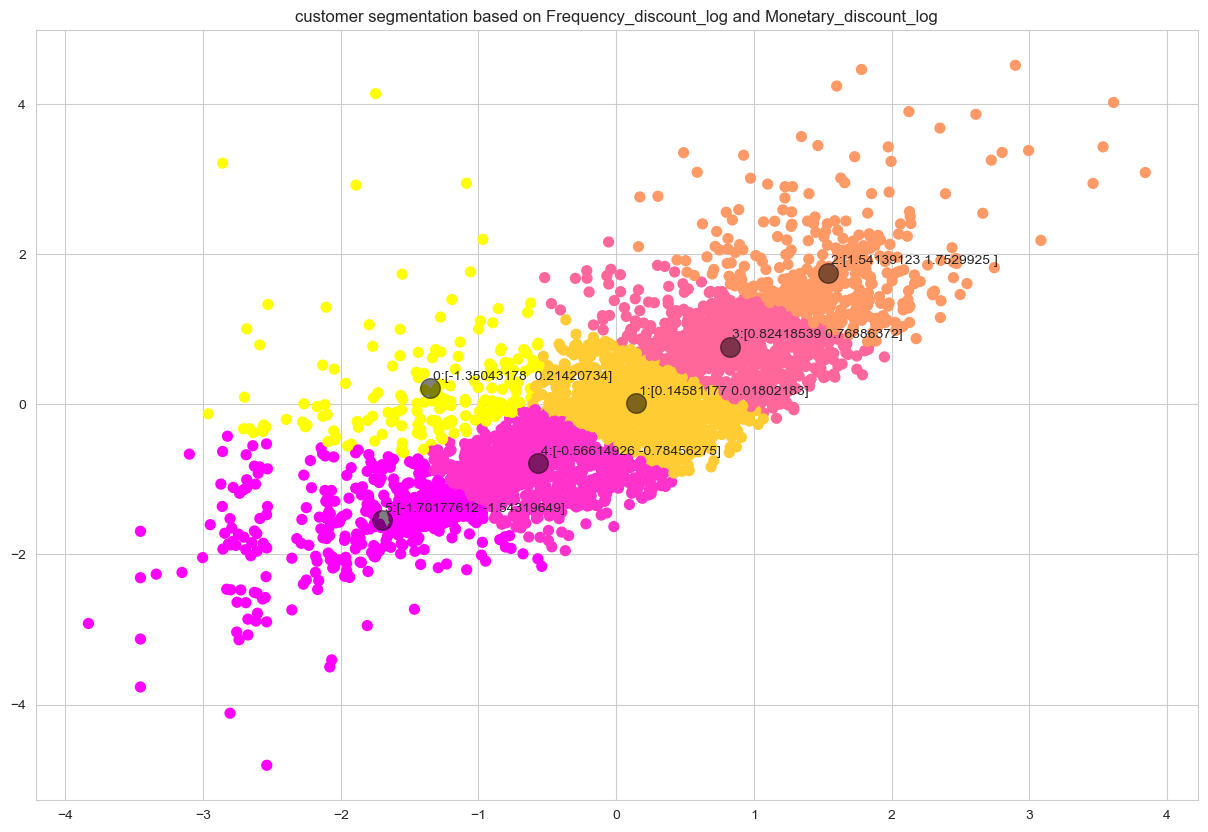

In [91]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency_discount_log and Monetary_discount_log')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')
centers = kmeans.cluster_centers_
for i in range(len(centers)):
    plt.annotate(str(i)+":"+ str(centers[i]), xy=(centers[i][0], centers[i][1]), xytext=(2, 6), textcoords='offset points')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Show the distribution of the customers within each cluster (Ratio & Percentage of customers per cluster divided by the total number of customers)

In [92]:
y_kmeans

array([0, 2, 1, ..., 4, 2, 3])

In [93]:
rfm_df['y_kmeans']=y_kmeans

In [94]:
rfm_df

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12347.0           2        182   4310.00  0.998091          181.652596   
12348.0          75         31   1797.24  0.927541           28.753761   
12349.0          18         73   1757.55  0.982781           71.742998   
12350.0         310         17    334.40  0.656550           11.161349   
...             ...        ...       ...       ...                 ...   
18280.0         277         10    180.60  0.706833            7.068331   
18281.0         180          7     80.82  0.820918            5.746428   
18282.0           7         12    178.05  0.993314           11.919773   
18283.0           3        756   2094.88  0.997136          753.835102   
18287.0          42         70   1837.28  0.959668           67.176760   

            Monetary_discount  R  F  M  F_d  ...  RFMGroup F_d_M_d_Group  \
CustomerID                                   ...                           
12346.0          48470.416027  1  1  4    1  ...       114            14   
12347.0           4301.773013  4  4  4    4  ...       444            44   
12348.0           1667.013194  2  2  4    2  ...       224            24   
12349.0           1727.286392  3  3  4    3  ...       334            34   
12350.0            219.550291  1  1  2    1  ...       112            11   
...                       ... .. .. ..  ...  ...       ...           ...   
18280.0            127.654051  1  1  1    1  ...       111            11   
18281.0             66.346613  1  1  1    1  ...       111            11   
18282.0            176.859634  4  1  1    1  ...       411            11   
18283.0           2088.881057  4  4  4    4  ...       444            44   
18287.0           1763.178830  3  3  4    3  ...       334            34   

           RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                                     
12346.0           6              5     5.783825       0.000000     11.253942   
12347.0          12              8     0.693147       5.204007      8.368693   
12348.0           8              6     4.317488       3.433987      7.494007   
12349.0          10              7     2.890372       4.290459      7.471676   
12350.0           4              2     5.736572       2.833213      5.812338   
...             ...            ...          ...            ...           ...   
18280.0           3              2     5.624018       2.302585      5.196285   
18281.0           3              2     5.192957       1.945910      4.392224   
18282.0           6              2     1.945910       2.484907      5.182064   
18283.0          12              8     1.098612       6.628041      7.647252   
18287.0          10              7     3.737670       4.248495      7.516041   

            Frequency_discount_log  Monetary_discount_log  y_kmeans  
CustomerID                                                           
12346.0                  -0.465233              10.788709         0  
12347.0                   5.202096               8.366783         2  
12348.0                   3.358769               7.418789         1  
12349.0                   4.273090               7.454307         3  
12350.0                   2.412457               5.391581         4  
...                            ...                    ...       ...  
18280.0                   1.955624               4.849324         5  
18281.0                   1.748578               4.194893         5  
18282.0                   2.478199               5.175356         4  
18283.0                   6.625174               7.644384         2  
18287.0                   4.207327               7.474874         3  

[4339 rows x 21 columns]

In [98]:
df_with_y_kmeans = df.merge(rfm_df['y_kmeans'], how='inner',on='CustomerID')
df = df_with_y_kmeans
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
397919    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
397920    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
397921    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
397922    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
397923    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
397919 2011-12-09 12:16:00       1.25     12713.0         Germany  December   
397920 2011-12-09 12:16:00       0.85     12713.0         Germany  December   
397921 2011-12-09 12:16:00       0.85     12713.0         Germany  December   
397922 2011-12-09 12:16:00       2.08     12713.0         Germany  December   
397923 2011-12-09 12:16:00       1.65     12713.0         Germany  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
0       Wednesday     8        15.30    Morning         3  
1       Wednesday     8        20.34    Morning         3  
2       Wednesday     8        22.00    Morning         3  
3       Wednesday     8        20.34    Morning         3  
4       Wednesday     8        20.34    Morning         3  
...           ...   ...          ...        ...       ...  
397919     Friday    12        15.00  Afternoon         1  
397920     Friday    12        10.20  Afternoon         1  
397921     Friday    12        10.20  Afternoon         1  
397922     Friday    12        24.96  Afternoon         1  
397923     Friday    12        16.50  Afternoon         1  

[397924 rows x 14 columns]

In [102]:
df_list = []
rfm_df_list=[]
for i in range(y_kmeans.max()):
    rfm_df_list.append(rfm_df[rfm_df['y_kmeans']==i])
    df_list.append(df_with_y_kmeans[df_with_y_kmeans['y_kmeans']==i])

In [104]:
rfm_df_list[0]

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12403.0          49          5    427.70  0.952889            4.764447   
12454.0          56         15   3528.34  0.946092           14.191384   
12497.0          81         14   1043.10  0.921648           12.903078   
12504.0          18          9    482.05  0.982781            8.845027   
...             ...        ...       ...       ...                 ...   
18142.0         157         15   1019.52  0.845088           12.676324   
18194.0          82          7    973.84  0.920665            6.444653   
18240.0          46          6    422.58  0.955797            5.734780   
18246.0          23          4    596.10  0.977981            3.911924   
18251.0          87         16   4314.72  0.915738           14.651815   

            Monetary_discount  R  F  M  F_d  ...  RFMGroup F_d_M_d_Group  \
CustomerID                                   ...                           
12346.0          48470.416027  1  1  4    1  ...       114            14   
12403.0            407.550807  3  1  2    1  ...       312            12   
12454.0           3338.135230  2  1  4    1  ...       214            14   
12497.0            961.371455  2  1  3    1  ...       213            13   
12504.0            473.749484  3  1  2    1  ...       312            12   
...                       ... .. .. ..  ...  ...       ...           ...   
18142.0            861.584392  1  1  3    1  ...       113            13   
18194.0            896.580080  2  1  3    1  ...       213            13   
18240.0            403.900588  3  1  2    1  ...       312            12   
18246.0            582.974443  3  1  2    1  ...       312            12   
18251.0           3951.154948  2  1  4    2  ...       214            24   

           RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                                     
12346.0           6              5     5.783825       0.000000     11.253942   
12403.0           6              3     3.891820       1.609438      6.058422   
12454.0           7              5     4.025352       2.708050      8.168583   
12497.0           6              4     4.394449       2.639057      6.949952   
12504.0           6              3     2.890372       2.197225      6.178048   
...             ...            ...          ...            ...           ...   
18142.0           5              4     5.056246       2.708050      6.927087   
18194.0           6              4     4.406719       1.945910      6.881247   
18240.0           6              3     3.828641       1.791759      6.046379   
18246.0           6              3     3.135494       1.386294      6.390408   
18251.0           7              6     4.465908       2.772589      8.369788   

            Frequency_discount_log  Monetary_discount_log  y_kmeans  
CustomerID                                                           
12346.0                  -0.465233              10.788709         0  
12403.0                   1.561182               6.010166         0  
12454.0                   2.652635               8.113168         0  
12497.0                   2.557466               6.868361         0  
12504.0                   2.179855               6.160679         0  
...                            ...                    ...       ...  
18142.0                   2.539736               6.758773         0  
18194.0                   1.863251               6.798588         0  
18240.0                   1.746549               6.001169         0  
18246.0                   1.364029               6.368143         0  
18251.0                   2.684564               8.281763         0  

[184 rows x 21 columns]

In [105]:
df_list[0]

InvoiceNo StockCode                          Description  Quantity  \
744       536374     21258           VICTORIAN SEWING BOX LARGE        32   
745       537767     21258           VICTORIAN SEWING BOX LARGE        32   
746       540563     21258           VICTORIAN SEWING BOX LARGE        16   
6834      536405     20914  SET/5 RED RETROSPOT LID GLASS BOWLS       128   
6835      540258     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        96   
...          ...       ...                                  ...       ...   
397649    581107     23461                SWEETHEART BIRD HOUSE       620   
397650    581110     23486             ANTIQUE HEART SHELF UNIT       150   
397651    581115     22413      METAL SIGN TAKE IT OR LEAVE IT       1404   
397872    581385    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        24   
397873    581385     21479        WHITE SKULL HOT WATER BOTTLE         72   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
744    2010-12-01 09:09:00      10.95     15100.0  United Kingdom  December   
745    2010-12-08 12:09:00      10.95     15100.0  United Kingdom  December   
746    2011-01-10 10:35:00      10.95     15100.0  United Kingdom   January   
6834   2010-12-01 11:32:00       2.55     14045.0  United Kingdom  December   
6835   2011-01-06 08:52:00       2.55     14045.0  United Kingdom   January   
...                    ...        ...         ...             ...       ...   
397649 2011-12-07 12:15:00       3.30     16000.0  United Kingdom  December   
397650 2011-12-07 12:17:00      13.35     16000.0  United Kingdom  December   
397651 2011-12-07 12:20:00       2.75     15195.0  United Kingdom  December   
397872 2011-12-08 13:11:00       3.75     13298.0  United Kingdom  December   
397873 2011-12-08 13:11:00       3.75     13298.0  United Kingdom  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
744     Wednesday     9        350.4    Morning         0  
745     Wednesday    12        350.4  Afternoon         0  
746        Monday    10        175.2    Morning         0  
6834    Wednesday    11        326.4    Morning         0  
6835     Thursday     8        244.8    Morning         0  
...           ...   ...          ...        ...       ...  
397649  Wednesday    12       2046.0  Afternoon         0  
397650  Wednesday    12       2002.5  Afternoon         0  
397651  Wednesday    12       3861.0  Afternoon         0  
397872   Thursday    13         90.0  Afternoon         0  
397873   Thursday    13        270.0  Afternoon         0  

[1398 rows x 14 columns]

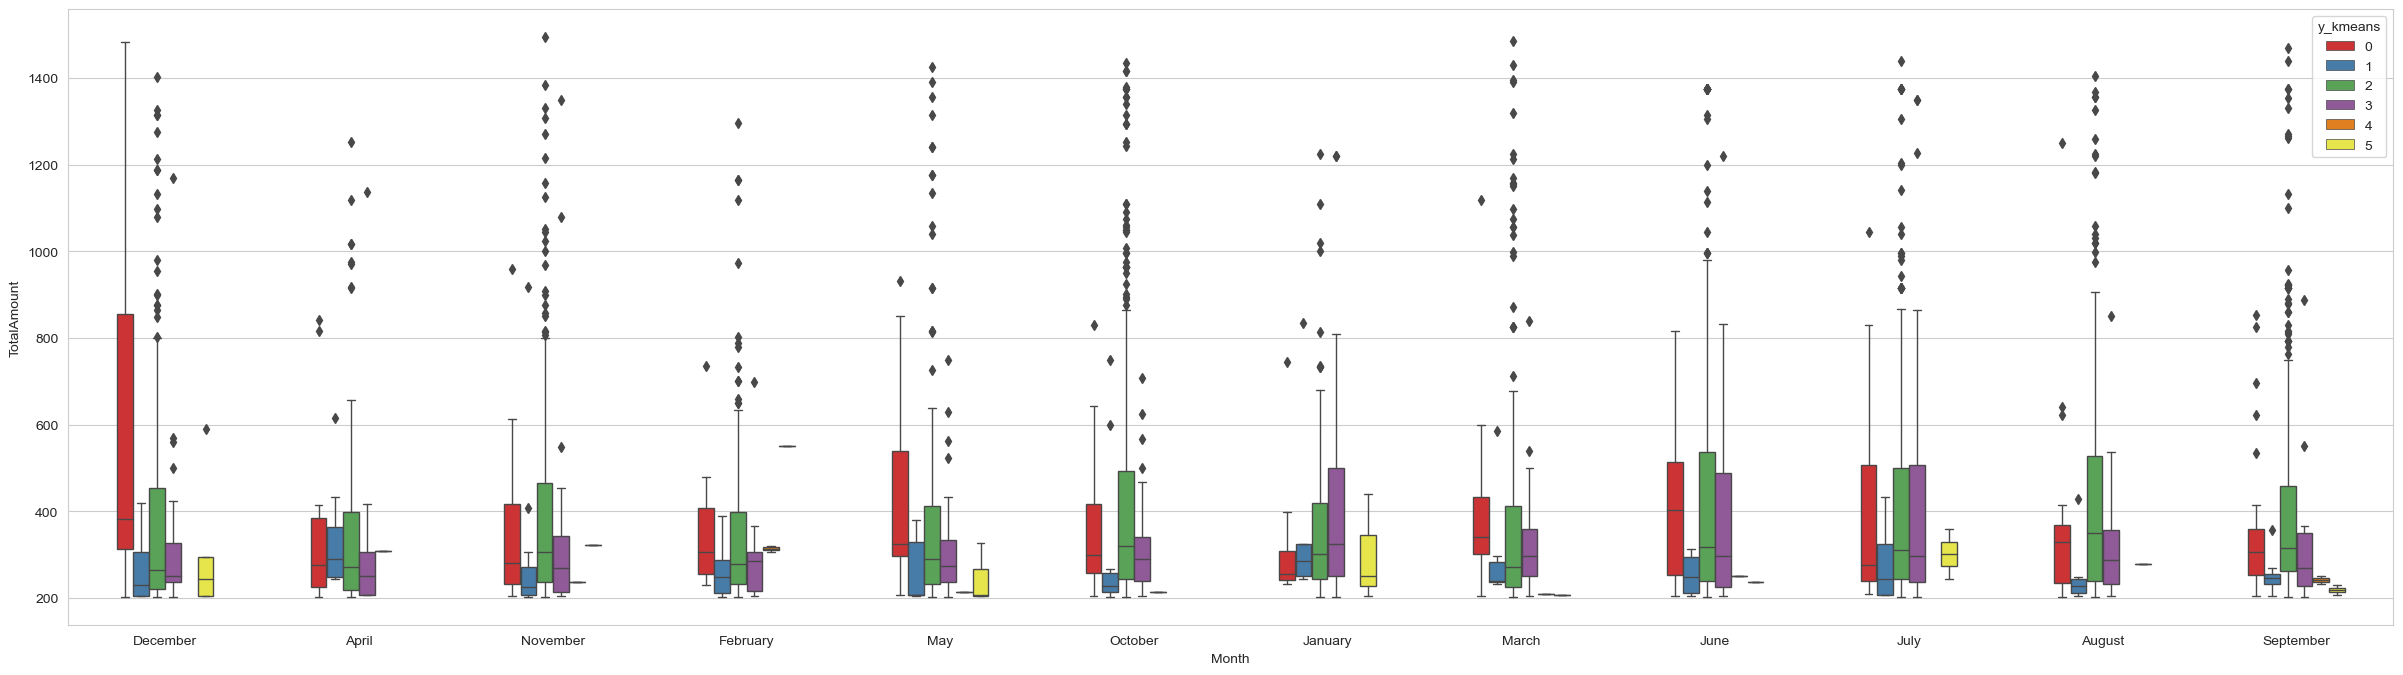

In [108]:
plt.figure(figsize=(30,8))
x_label = 'Month'
y_label = 'TotalAmount'
temp_print_data = df[['Month', y_label, "y_kmeans"]]
temp_print_data=temp_print_data[temp_print_data['TotalAmount']>200 ]
temp_print_data=temp_print_data[temp_print_data['TotalAmount']<1500]
temp_print_data
sns.boxplot(x=x_label, y=y_label, data=temp_print_data, hue='y_kmeans', width=0.5, linewidth=1.0, palette="Set1")
rfm_df_list = []
df_list = []

<Axes: xlabel='y_kmeans', ylabel='Recency'>

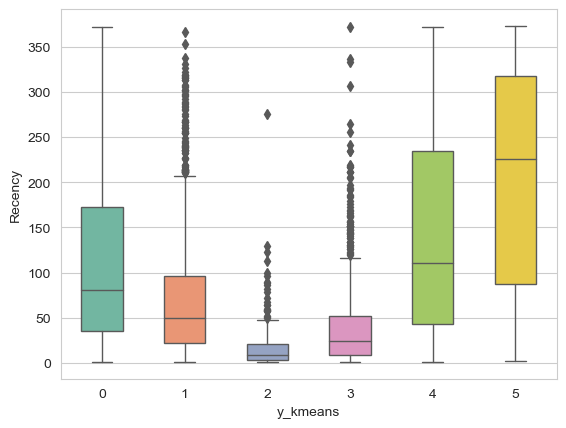

In [109]:
x_label = 'y_kmeans'
y_label='Recency'#y_label = 'F_d_M_d_Score'
temp_print_data = rfm_df[[x_label, y_label]]

# temp_print_data=temp_print_data[temp_print_data['TotalAmount']>200 ]
# temp_print_data=temp_print_data[temp_print_data['TotalAmount']<1500]
temp_print_data
sns.boxplot(x=x_label, y=y_label, data=temp_print_data, width=0.5, linewidth=1.0, palette="Set2")

<Axes: xlabel='y_kmeans', ylabel='F_d_M_d_Score'>

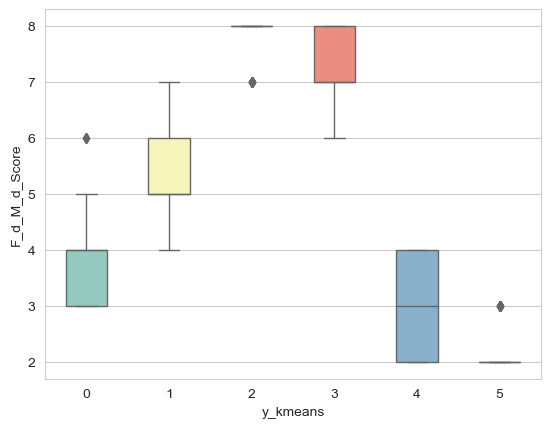

In [110]:
x_label = 'y_kmeans'
y_label='F_d_M_d_Score'#y_label = 'F_d_M_d_Score'
temp_print_data = rfm_df[[x_label, y_label]]
temp_print_data
sns.boxplot(x=x_label, y=y_label, data=temp_print_data, width=0.5, linewidth=1.0, palette="Set3")



<Axes: xlabel='y_kmeans', ylabel='RFMScore'>

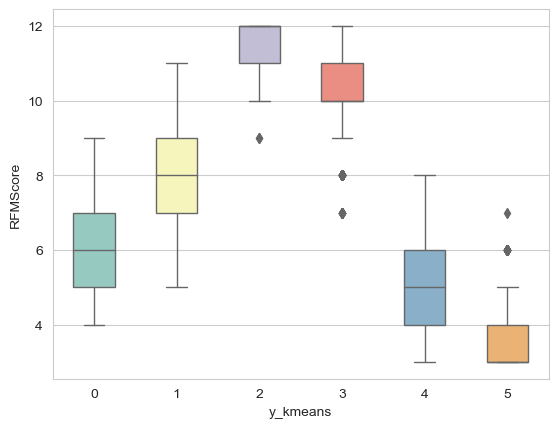

In [111]:
x_label = 'y_kmeans'
y_label='RFMScore'#y_label = 'F_d_M_d_Score'
temp_print_data = rfm_df[[x_label, y_label]]
temp_print_data
sns.boxplot(x=x_label, y=y_label, data=temp_print_data, width=0.5, linewidth=1.0, palette="Set3")

In [103]:
rfm_df_0=rfm_df[rfm_df['y_kmeans']==0]
rfm_df_0

Recency  Frequency  Monetary  discount  Frequency_discount  \
CustomerID                                                               
12346.0         325          1  77183.60  0.627989            0.627989   
12403.0          49          5    427.70  0.952889            4.764447   
12454.0          56         15   3528.34  0.946092           14.191384   
12497.0          81         14   1043.10  0.921648           12.903078   
12504.0          18          9    482.05  0.982781            8.845027   
...             ...        ...       ...       ...                 ...   
18142.0         157         15   1019.52  0.845088           12.676324   
18194.0          82          7    973.84  0.920665            6.444653   
18240.0          46          6    422.58  0.955797            5.734780   
18246.0          23          4    596.10  0.977981            3.911924   
18251.0          87         16   4314.72  0.915738           14.651815   

            Monetary_discount  R  F  M  F_d  ...  RFMGroup F_d_M_d_Group  \
CustomerID                                   ...                           
12346.0          48470.416027  1  1  4    1  ...       114            14   
12403.0            407.550807  3  1  2    1  ...       312            12   
12454.0           3338.135230  2  1  4    1  ...       214            14   
12497.0            961.371455  2  1  3    1  ...       213            13   
12504.0            473.749484  3  1  2    1  ...       312            12   
...                       ... .. .. ..  ...  ...       ...           ...   
18142.0            861.584392  1  1  3    1  ...       113            13   
18194.0            896.580080  2  1  3    1  ...       213            13   
18240.0            403.900588  3  1  2    1  ...       312            12   
18246.0            582.974443  3  1  2    1  ...       312            12   
18251.0           3951.154948  2  1  4    2  ...       214            24   

           RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                                     
12346.0           6              5     5.783825       0.000000     11.253942   
12403.0           6              3     3.891820       1.609438      6.058422   
12454.0           7              5     4.025352       2.708050      8.168583   
12497.0           6              4     4.394449       2.639057      6.949952   
12504.0           6              3     2.890372       2.197225      6.178048   
...             ...            ...          ...            ...           ...   
18142.0           5              4     5.056246       2.708050      6.927087   
18194.0           6              4     4.406719       1.945910      6.881247   
18240.0           6              3     3.828641       1.791759      6.046379   
18246.0           6              3     3.135494       1.386294      6.390408   
18251.0           7              6     4.465908       2.772589      8.369788   

            Frequency_discount_log  Monetary_discount_log  y_kmeans  
CustomerID                                                           
12346.0                  -0.465233              10.788709         0  
12403.0                   1.561182               6.010166         0  
12454.0                   2.652635               8.113168         0  
12497.0                   2.557466               6.868361         0  
12504.0                   2.179855               6.160679         0  
...                            ...                    ...       ...  
18142.0                   2.539736               6.758773         0  
18194.0                   1.863251               6.798588         0  
18240.0                   1.746549               6.001169         0  
18246.0                   1.364029               6.368143         0  
18251.0                   2.684564               8.281763         0  

[184 rows x 21 columns]

In [158]:
rfm_df_0.describe()

Recency   Frequency    Monetary    discount  Frequency_discount  \
count  452.000000  452.000000  452.000000  452.000000          452.000000   
mean   198.099558    5.750000  149.627699    0.794673            4.106897   
std    122.436956    5.461161   98.761512    0.197580            2.425547   
min      1.000000    1.000000    1.000000    0.182038            0.182038   
25%     74.000000    3.000000   90.235000    0.737582            1.968217   
50%    216.000000    5.000000  123.520000    0.836144            4.014902   
75%    304.500000    7.250000  177.237500    0.948052            5.856506   
max    373.000000   71.000000  590.000000    0.999313           16.575574   

       Monetary_discount           R           F           M         F_d  \
count         452.000000  452.000000  452.000000  452.000000  452.000000   
mean          114.662212    1.603982    1.019912    1.097345    1.002212   
std            79.228956    0.939539    0.168605    0.296756    0.047036   
min             1.000000    1.000000    1.000000    1.000000    1.000000   
25%            68.873534    1.000000    1.000000    1.000000    1.000000   
50%            96.764878    1.000000    1.000000    1.000000    1.000000   
75%           133.577823    2.000000    1.000000    1.000000    1.000000   
max           450.024558    4.000000    3.000000    2.000000    2.000000   

              M_d    RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  \
count  452.000000  452.000000     452.000000   452.000000     452.000000   
mean     1.064159    3.721239       2.066372     4.895194       1.452744   
std      0.245308    0.988712       0.249206     1.136367       0.803346   
min      1.000000    3.000000       2.000000     0.000000       0.000000   
25%      1.000000    3.000000       2.000000     4.304065       1.098612   
50%      1.000000    3.000000       2.000000     5.375268       1.609438   
75%      1.000000    4.000000       2.000000     5.718667       1.979293   
max      2.000000    7.000000       3.000000     5.921578       4.262680   

       Monetary_log  Frequency_discount_log  Monetary_discount_log  y_kmeans  
count    452.000000              452.000000             452.000000     452.0  
mean       4.790720                1.172827               4.510824       0.0  
std        0.729030                0.781457               0.750659       0.0  
min        0.000000               -1.703539               0.000000       0.0  
25%        4.502417                0.677128               4.232270       0.0  
50%        4.816401                1.390010               4.572284       0.0  
75%        5.177490                1.767553               4.894684       0.0  
max        6.380123                2.807930               6.109302       0.0

In [159]:
rfm_df_1=rfm_df[rfm_df['y_kmeans']==1]
rfm_df_1.describe()

Recency   Frequency       Monetary    discount  Frequency_discount  \
count  191.000000  191.000000     191.000000  191.000000          191.000000   
mean   108.827225   10.146597    3073.251885    0.912953            9.275062   
std     94.651697    6.148982   13921.229615    0.095227            5.519476   
min      1.000000    1.000000     389.640000    0.309613            0.619225   
25%     31.000000    5.000000     654.740000    0.883288            4.781335   
50%     79.000000   10.000000     944.100000    0.944444            8.888220   
75%    160.000000   15.000000    1655.390000    0.978532           13.329142   
max    372.000000   35.000000  168472.500000    1.000000           23.484778   

       Monetary_discount           R           F           M         F_d  \
count         191.000000  191.000000  191.000000  191.000000  191.000000   
mean         2775.717754    2.214660    1.120419    2.968586    1.204188   
std         13179.627226    1.000523    0.326306    0.710121    0.404167   
min           377.996387    1.000000    1.000000    2.000000    1.000000   
25%           588.717913    1.000000    1.000000    2.000000    1.000000   
50%           867.349444    2.000000    1.000000    3.000000    1.000000   
75%          1365.408904    3.000000    1.000000    3.000000    1.000000   
max        168472.500000    4.000000    2.000000    4.000000    2.000000   

              M_d    RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  \
count  191.000000  191.000000     191.000000   191.000000     191.000000   
mean     2.905759    6.303665       4.109948     4.156968       2.086946   
std      0.719297    1.361863       0.896458     1.253431       0.749009   
min      2.000000    4.000000       3.000000     0.000000       0.000000   
25%      2.000000    5.000000       3.000000     3.433987       1.609438   
50%      3.000000    6.000000       4.000000     4.369448       2.302585   
75%      3.000000    7.000000       5.000000     5.074998       2.708050   
max      4.000000   10.000000       6.000000     5.918894       3.555348   

       Monetary_log  Frequency_discount_log  Monetary_discount_log  y_kmeans  
count    191.000000              191.000000             191.000000     191.0  
mean       7.056999                1.988824               6.958877       1.0  
std        0.877853                0.778012               0.878282       0.0  
min        5.965223               -0.479286               5.934885       1.0  
25%        6.484234                1.564689               6.377941       1.0  
50%        6.850232                2.184727               6.765442       1.0  
75%        7.411788                2.589947               7.219167       1.0  
max       12.034528                3.156352              12.034528       1.0

In [160]:
rfm_df_2=rfm_df[rfm_df['y_kmeans']==2]
rfm_df_2.describe()

Recency   Frequency      Monetary    discount  Frequency_discount  \
count  957.000000  957.000000    957.000000  957.000000          957.000000   
mean    40.141066  137.072100   2216.426093    0.970833          133.186246   
std     48.593416   71.839882   1121.753736    0.042215           70.499359   
min      1.000000   26.000000    605.060000    0.309613           23.906139   
25%      9.000000   87.000000   1483.560000    0.963762           85.170136   
50%     24.000000  119.000000   1995.460000    0.983413          114.971260   
75%     52.000000  166.000000   2702.490000    0.993805          162.607203   
max    372.000000  547.000000  11990.960000    1.000000          545.495840   

       Monetary_discount           R           F           M         F_d  \
count         957.000000  957.000000  957.000000  957.000000  957.000000   
mean         2146.914962    3.092999    3.631139    3.641588    3.635319   
std          1077.330785    0.912903    0.522298    0.499021    0.517200   
min           594.047442    1.000000    2.000000    2.000000    2.000000   
25%          1428.710375    2.000000    3.000000    3.000000    3.000000   
50%          1930.210310    3.000000    4.000000    4.000000    4.000000   
75%          2618.514375    4.000000    4.000000    4.000000    4.000000   
max         11858.651817    4.000000    4.000000    4.000000    4.000000   

              M_d    RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  \
count  957.000000  957.000000     957.000000   957.000000     957.000000   
mean     3.654127   10.365726       7.289446     3.005279       4.801389   
std      0.484613    1.170593       0.709192     1.306773       0.487014   
min      2.000000    7.000000       6.000000     0.000000       3.258097   
25%      3.000000   10.000000       7.000000     2.197225       4.465908   
50%      4.000000   10.000000       7.000000     3.178054       4.779123   
75%      4.000000   11.000000       8.000000     3.951244       5.111988   
max      4.000000   12.000000       8.000000     5.918894       6.304449   

       Monetary_log  Frequency_discount_log  Monetary_discount_log  y_kmeans  
count    957.000000              957.000000             957.000000     957.0  
mean       7.597543                4.770542               7.566695       2.0  
std        0.456573                0.490913               0.454636       0.0  
min        6.405328                3.174135               6.386959       2.0  
25%        7.302200                4.444651               7.264527       2.0  
50%        7.598630                4.744682               7.565384       2.0  
75%        7.901929                5.091337               7.870362       2.0  
max        9.391908                6.301695               9.380813       2.0

In [161]:
rfm_df_3=rfm_df[rfm_df['y_kmeans']==3]
rfm_df_3.describe()

Recency    Frequency     Monetary     discount  Frequency_discount  \
count  1110.000000  1110.000000  1110.000000  1110.000000         1110.000000   
mean    140.046847    21.136036   288.534758     0.883159           18.312459   
std     108.373422    11.598500   113.925064     0.113745            9.479951   
min       1.000000     5.000000    62.430000     0.182038            4.927491   
25%      44.000000    13.000000   197.342500     0.817553           11.559914   
50%     112.000000    19.000000   284.095000     0.920214           16.395985   
75%     236.000000    25.000000   363.650000     0.969413           21.991628   
max     373.000000   105.000000   754.870000     0.999313           62.217543   

       Monetary_discount            R            F            M          F_d  \
count        1110.000000  1110.000000  1110.000000  1110.000000  1110.000000   
mean          252.651117     1.938739     1.613514     1.428829     1.614414   
std            99.319375     1.012026     0.599968     0.500565     0.579924   
min            46.126395     1.000000     1.000000     1.000000     1.000000   
25%           173.266458     1.000000     1.000000     1.000000     1.000000   
50%           243.853980     2.000000     2.000000     1.000000     2.000000   
75%           323.221506     3.000000     2.000000     2.000000     2.000000   
max           575.226056     4.000000     4.000000     3.000000     3.000000   

               M_d     RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  \
count  1110.000000  1110.000000    1110.000000  1110.000000    1110.000000   
mean      1.425225     4.981081       3.039640     4.466669       2.927289   
std       0.494600     1.224415       0.823601     1.167260       0.488049   
min       1.000000     3.000000       2.000000     0.000000       1.609438   
25%       1.000000     4.000000       2.000000     3.784190       2.564949   
50%       1.000000     5.000000       3.000000     4.718499       2.944439   
75%       2.000000     6.000000       4.000000     5.463832       3.218876   
max       2.000000     8.000000       4.000000     5.921578       4.653960   

       Monetary_log  Frequency_discount_log  Monetary_discount_log  y_kmeans  
count   1110.000000             1110.000000            1110.000000    1110.0  
mean       5.581536                2.792406               5.446653       3.0  
std        0.421708                0.473665               0.430715       0.0  
min        4.134046                1.594830               3.831385       3.0  
25%        5.284940                2.447543               5.154831       3.0  
50%        5.649308                2.797036               5.496570       3.0  
75%        5.896192                3.090662               5.778338       3.0  
max        6.626546                4.130637               6.354763       3.0

In [162]:
rfm_df_4 = rfm_df[rfm_df['y_kmeans'] == 4]
rfm_df_4.describe()

Recency    Frequency     Monetary     discount  Frequency_discount  \
count  1242.000000  1242.000000  1242.000000  1242.000000         1242.000000   
mean     71.880032    54.055556   786.137151     0.946849           51.124405   
std      71.773264    26.661896   341.041422     0.058170           25.249328   
min       1.000000    18.000000   190.190000     0.616744           17.813851   
25%      21.000000    35.000000   547.030000     0.932791           32.458913   
50%      47.000000    47.000000   709.995000     0.967297           44.959252   
75%      95.000000    64.000000   992.157500     0.985498           61.526376   
max     353.000000   192.000000  2661.240000     1.000000          183.814380   

       Monetary_discount            R            F            M          F_d  \
count        1242.000000  1242.000000  1242.000000  1242.000000  1242.000000   
mean          743.146437     2.573269     2.682770     2.548309     2.701288   
std           322.977218     0.990622     0.590696     0.600565     0.587390   
min           188.617761     1.000000     2.000000     1.000000     2.000000   
25%           511.444719     2.000000     2.000000     2.000000     2.000000   
50%           672.901516     3.000000     3.000000     3.000000     3.000000   
75%           933.542163     3.000000     3.000000     3.000000     3.000000   
max          2143.106149     4.000000     4.000000     4.000000     4.000000   

               M_d     RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  \
count  1242.000000  1242.000000    1242.000000  1242.000000    1242.000000   
mean      2.563607     7.804348       5.264895     3.696639       3.886315   
std       0.573013     1.303147       0.829478     1.240293       0.445836   
min       1.000000     5.000000       4.000000     0.000000       2.890372   
25%       2.000000     7.000000       5.000000     3.044522       3.555348   
50%       3.000000     8.000000       5.000000     3.850148       3.850148   
75%       3.000000     9.000000       6.000000     4.553877       4.158883   
max       4.000000    11.000000       7.000000     5.866468       5.257495   

       Monetary_log  Frequency_discount_log  Monetary_discount_log  y_kmeans  
count   1242.000000             1242.000000            1242.000000    1242.0  
mean       6.575964                3.829628               6.519278       4.0  
std        0.432789                0.448268               0.433432       0.0  
min        5.248024                2.879976               5.239723       4.0  
25%        6.304504                3.479975               6.237239       4.0  
50%        6.565258                3.805756               6.511599       4.0  
75%        6.899882                4.119466               6.838986       4.0  
max        7.886547                5.213926               7.670012       4.0

In [163]:
rfm_df_5 = rfm_df[rfm_df['y_kmeans'] == 5]
rfm_df_5.describe()

Recency    Frequency       Monetary    discount  Frequency_discount  \
count  387.000000   387.000000     387.000000  387.000000          387.000000   
mean    15.333333   443.439276   12503.902791    0.989309          440.005016   
std     21.955442   642.504364   26087.391149    0.016415          642.000105   
min      1.000000    45.000000    2005.060000    0.776494           44.783283   
25%      3.000000   215.500000    4309.305000    0.985498          213.351175   
50%      9.000000   310.000000    5870.080000    0.993805          306.304354   
75%     21.000000   459.000000   10225.375000    0.997938          456.157145   
max    275.000000  7847.000000  280206.020000    1.000000         7841.609622   

       Monetary_discount           R           F      M         F_d    M_d  \
count         387.000000  387.000000  387.000000  387.0  387.000000  387.0   
mean        12408.716816    3.664083    3.966408    4.0    3.971576    4.0   
std         26013.914899    0.576596    0.180409    0.0    0.166395    0.0   
min          2003.682654    1.000000    3.000000    4.0    3.000000    4.0   
25%          4204.746320    3.000000    4.000000    4.0    4.000000    4.0   
50%          5773.784646    4.000000    4.000000    4.0    4.000000    4.0   
75%          9847.960198    4.000000    4.000000    4.0    4.000000    4.0   
max        280013.536710    4.000000    4.000000    4.0    4.000000    4.0   

         RFMScore  F_d_M_d_Score  Recency_log  Frequency_log  Monetary_log  \
count  387.000000     387.000000   387.000000     387.000000    387.000000   
mean    11.630491       7.971576     2.021792       5.781181      8.898761   
std      0.606870       0.166395     1.261623       0.687202      0.813007   
min      9.000000       7.000000     0.000000       3.806662      7.603429   
25%     11.000000       8.000000     1.098612       5.372958      8.368532   
50%     12.000000       8.000000     2.197225       5.736572      8.677624   
75%     12.000000       8.000000     3.044522       6.129048      9.232624   
max     12.000000       8.000000     5.616771       8.967887     12.543280   

       Frequency_discount_log  Monetary_discount_log  y_kmeans  
count              387.000000             387.000000     387.0  
mean                 5.770283               8.887864       5.0  
std                  0.690360               0.814972       0.0  
min                  3.801835               7.602742       5.0  
25%                  5.362938               8.343969       5.0  
50%                  5.724579               8.661083       5.0  
75%                  6.122813               9.195006       5.0  
max                  8.967199              12.542593       5.0

In [164]:
rfm_df_6 = rfm_df[rfm_df['y_kmeans'] == 6]
rfm_df_6.describe()

Recency  Frequency  Monetary  discount  Frequency_discount  \
count      0.0        0.0       0.0       0.0                 0.0   
mean       NaN        NaN       NaN       NaN                 NaN   
std        NaN        NaN       NaN       NaN                 NaN   
min        NaN        NaN       NaN       NaN                 NaN   
25%        NaN        NaN       NaN       NaN                 NaN   
50%        NaN        NaN       NaN       NaN                 NaN   
75%        NaN        NaN       NaN       NaN                 NaN   
max        NaN        NaN       NaN       NaN                 NaN   

       Monetary_discount    R    F    M  F_d  M_d  RFMScore  F_d_M_d_Score  \
count                0.0  0.0  0.0  0.0  0.0  0.0       0.0            0.0   
mean                 NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   
std                  NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   
min                  NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   
25%                  NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   
50%                  NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   
75%                  NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   
max                  NaN  NaN  NaN  NaN  NaN  NaN       NaN            NaN   

       Recency_log  Frequency_log  Monetary_log  Frequency_discount_log  \
count          0.0            0.0           0.0                     0.0   
mean           NaN            NaN           NaN                     NaN   
std            NaN            NaN           NaN                     NaN   
min            NaN            NaN           NaN                     NaN   
25%            NaN            NaN           NaN                     NaN   
50%            NaN            NaN           NaN                     NaN   
75%            NaN            NaN           NaN                     NaN   
max            NaN            NaN           NaN                     NaN   

       Monetary_discount_log  y_kmeans  
count                    0.0       0.0  
mean                     NaN       NaN  
std                      NaN       NaN  
min                      NaN       NaN  
25%                      NaN       NaN  
50%                      NaN       NaN  
75%                      NaN       NaN  
max                      NaN       NaN

In [165]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France  December   
541905 2011-12-09 12:50:00       2.10     12680.0          France  December   
541906 2011-12-09 12:50:00       4.15     12680.0          France  December   
541907 2011-12-09 12:50:00       4.15     12680.0          France  December   
541908 2011-12-09 12:50:00       4.95     12680.0          France  December   

              Day  Hour  TotalAmount  Time_type  
0       Wednesday     8        15.30    Morning  
1       Wednesday     8        20.34    Morning  
2       Wednesday     8        22.00    Morning  
3       Wednesday     8        20.34    Morning  
4       Wednesday     8        20.34    Morning  
...           ...   ...          ...        ...  
541904     Friday    12        10.20  Afternoon  
541905     Friday    12        12.60  Afternoon  
541906     Friday    12        16.60  Afternoon  
541907     Friday    12        16.60  Afternoon  
541908     Friday    12        14.85  Afternoon  

[397924 rows x 13 columns]

In [166]:
df_with_y_kmeans = df.merge(rfm_df['y_kmeans'], how='inner',on='CustomerID')

In [167]:
df_with_y_kmeans

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
397919    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
397920    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
397921    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
397922    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
397923    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
397919 2011-12-09 12:16:00       1.25     12713.0         Germany  December   
397920 2011-12-09 12:16:00       0.85     12713.0         Germany  December   
397921 2011-12-09 12:16:00       0.85     12713.0         Germany  December   
397922 2011-12-09 12:16:00       2.08     12713.0         Germany  December   
397923 2011-12-09 12:16:00       1.65     12713.0         Germany  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
0       Wednesday     8        15.30    Morning         2  
1       Wednesday     8        20.34    Morning         2  
2       Wednesday     8        22.00    Morning         2  
3       Wednesday     8        20.34    Morning         2  
4       Wednesday     8        20.34    Morning         2  
...           ...   ...          ...        ...       ...  
397919     Friday    12        15.00  Afternoon         4  
397920     Friday    12        10.20  Afternoon         4  
397921     Friday    12        10.20  Afternoon         4  
397922     Friday    12        24.96  Afternoon         4  
397923     Friday    12        16.50  Afternoon         4  

[397924 rows x 14 columns]

In [168]:
df_with_y_kmeans.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID           Hour    TotalAmount       y_kmeans  
count  397924.000000  397924.000000  397924.000000  397924.000000  
mean    15294.315171      12.728247      22.394749       3.672259  
min     12346.000000       6.000000       0.000000       0.000000  
25%     13969.000000      11.000000       4.680000       2.000000  
50%     15159.000000      13.000000      11.800000       4.000000  
75%     16795.000000      14.000000      19.800000       5.000000  
max     18287.000000      20.000000  168469.600000       5.000000  
std      1713.169877       2.273535     309.055588       1.360064

In [169]:
df_0=df_with_y_kmeans[df_with_y_kmeans['y_kmeans']==0]
df_0

InvoiceNo StockCode                          Description  Quantity  \
3684      536384     82484    WOOD BLACK BOARD ANT WHITE FINISH         3   
3685      536384     84755  COLOUR GLASS T-LIGHT HOLDER HANGING        48   
3686      536384     22464          HANGING METAL HEART LANTERN        12   
3687      536384     21324         HANGING MEDINA LANTERN SMALL         6   
3688      536384     22457      NATURAL SLATE HEART CHALKBOARD         12   
...          ...       ...                                  ...       ...   
397595    580977     23545               WRAP RED VINTAGE DOILY        25   
397596    580977     23231                 WRAP  VINTAGE DOILY         25   
397597    580977     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         6   
397872    581385    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        24   
397873    581385     21479        WHITE SKULL HOT WATER BOTTLE         72   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
3684   2010-12-01 09:53:00       6.45     18074.0  United Kingdom  December   
3685   2010-12-01 09:53:00       0.65     18074.0  United Kingdom  December   
3686   2010-12-01 09:53:00       1.65     18074.0  United Kingdom  December   
3687   2010-12-01 09:53:00       2.95     18074.0  United Kingdom  December   
3688   2010-12-01 09:53:00       2.95     18074.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
397595 2011-12-06 15:32:00       0.42     16569.0  United Kingdom  December   
397596 2011-12-06 15:32:00       0.42     16569.0  United Kingdom  December   
397597 2011-12-06 15:32:00       7.95     16569.0  United Kingdom  December   
397872 2011-12-08 13:11:00       3.75     13298.0  United Kingdom  December   
397873 2011-12-08 13:11:00       3.75     13298.0  United Kingdom  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
3684    Wednesday     9        19.35    Morning         0  
3685    Wednesday     9        31.20    Morning         0  
3686    Wednesday     9        19.80    Morning         0  
3687    Wednesday     9        17.70    Morning         0  
3688    Wednesday     9        35.40    Morning         0  
...           ...   ...          ...        ...       ...  
397595    Tuesday    15        10.50  Afternoon         0  
397596    Tuesday    15        10.50  Afternoon         0  
397597    Tuesday    15        47.70  Afternoon         0  
397872   Thursday    13        90.00  Afternoon         0  
397873   Thursday    13       270.00  Afternoon         0  

[2599 rows x 14 columns]

In [170]:
df_0.describe()

Quantity                    InvoiceDate    UnitPrice    CustomerID  \
count   2599.000000                           2599  2599.000000   2599.000000   
mean      20.280877  2011-04-15 14:17:30.473258752     4.262547  15513.629858   
min        1.000000            2010-12-01 09:53:00     0.000000  12353.000000   
25%        3.000000            2010-12-15 11:21:00     1.250000  14148.000000   
50%        8.000000            2011-03-20 10:51:00     2.100000  15428.000000   
75%       12.000000            2011-07-19 09:49:00     4.250000  16982.000000   
max    12540.000000            2011-12-08 13:11:00   464.900000  18281.000000   
std      251.657147                            NaN    14.844272   1708.281578   

              Hour  TotalAmount  y_kmeans  
count  2599.000000  2599.000000    2599.0  
mean     12.443247    26.021824       0.0  
min       7.000000     0.000000       0.0  
25%      11.000000    10.200000       0.0  
50%      12.000000    16.500000       0.0  
75%      14.000000    23.400000       0.0  
max      19.000000   590.000000       0.0  
std       2.447712    43.326396       0.0

In [171]:
df_1=df_with_y_kmeans[df_with_y_kmeans['y_kmeans']==1]
df_1

InvoiceNo StockCode                          Description  Quantity  \
744       536374     21258           VICTORIAN SEWING BOX LARGE        32   
745       537767     21258           VICTORIAN SEWING BOX LARGE        32   
746       540563     21258           VICTORIAN SEWING BOX LARGE        16   
6834      536405     20914  SET/5 RED RETROSPOT LID GLASS BOWLS       128   
6835      540258     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        96   
...          ...       ...                                  ...       ...   
397647    581105     22961               JAM MAKING SET PRINTED       620   
397648    581105     23552         BICYCLE PUNCTURE REPAIR KIT        620   
397649    581107     23461                SWEETHEART BIRD HOUSE       620   
397650    581110     23486             ANTIQUE HEART SHELF UNIT       150   
397651    581115     22413      METAL SIGN TAKE IT OR LEAVE IT       1404   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
744    2010-12-01 09:09:00      10.95     15100.0  United Kingdom  December   
745    2010-12-08 12:09:00      10.95     15100.0  United Kingdom  December   
746    2011-01-10 10:35:00      10.95     15100.0  United Kingdom   January   
6834   2010-12-01 11:32:00       2.55     14045.0  United Kingdom  December   
6835   2011-01-06 08:52:00       2.55     14045.0  United Kingdom   January   
...                    ...        ...         ...             ...       ...   
397647 2011-12-07 12:14:00       1.38     16000.0  United Kingdom  December   
397648 2011-12-07 12:14:00       1.86     16000.0  United Kingdom  December   
397649 2011-12-07 12:15:00       3.30     16000.0  United Kingdom  December   
397650 2011-12-07 12:17:00      13.35     16000.0  United Kingdom  December   
397651 2011-12-07 12:20:00       2.75     15195.0  United Kingdom  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
744     Wednesday     9        350.4    Morning         1  
745     Wednesday    12        350.4  Afternoon         1  
746        Monday    10        175.2    Morning         1  
6834    Wednesday    11        326.4    Morning         1  
6835     Thursday     8        244.8    Morning         1  
...           ...   ...          ...        ...       ...  
397647  Wednesday    12        855.6  Afternoon         1  
397648  Wednesday    12       1153.2  Afternoon         1  
397649  Wednesday    12       2046.0  Afternoon         1  
397650  Wednesday    12       2002.5  Afternoon         1  
397651  Wednesday    12       3861.0  Afternoon         1  

[1938 rows x 14 columns]

In [172]:
df_1.describe()

Quantity                    InvoiceDate    UnitPrice    CustomerID  \
count   1938.000000                           1938  1938.000000   1938.000000   
mean     175.103715  2011-07-03 20:51:46.501548032     7.985795  15199.555212   
min        1.000000            2010-12-01 09:09:00     0.000000  12346.000000   
25%       12.000000            2011-03-30 09:47:15     1.250000  13929.000000   
50%       24.000000            2011-07-28 17:09:00     2.490000  15181.000000   
75%       72.000000            2011-10-07 15:13:00     4.250000  16563.000000   
max    80995.000000            2011-12-09 09:15:00  2033.100000  18251.000000   
std     2507.769706                            NaN    71.426406   1645.658493   

              Hour    TotalAmount  y_kmeans  
count  1938.000000    1938.000000    1938.0  
mean     12.433437     302.884990       1.0  
min       7.000000       0.000000       1.0  
25%      10.000000      25.200000       1.0  
50%      12.000000      69.120000       1.0  
75%      15.000000     149.670000       1.0  
max      20.000000  168469.600000       1.0  
std       2.392761    4315.002401       0.0

In [173]:
df_2 = df_with_y_kmeans[df_with_y_kmeans['y_kmeans'] == 2]
df_2

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
396714    581405     22955             36 FOIL STAR CAKE CASES          4   
396715    581405     22956             36 FOIL HEART CAKE CASES         2   
396716    581405     23320         GIANT 50'S CHRISTMAS CRACKER         2   
396717    581405     22094             RED RETROSPOT TISSUE BOX         4   
396718    581405     22942          CHRISTMAS LIGHTS 10 SANTAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
396714 2011-12-08 13:50:00       0.79     13521.0  United Kingdom  December   
396715 2011-12-08 13:50:00       0.79     13521.0  United Kingdom  December   
396716 2011-12-08 13:50:00       1.25     13521.0  United Kingdom  December   
396717 2011-12-08 13:50:00       0.39     13521.0  United Kingdom  December   
396718 2011-12-08 13:50:00       2.95     13521.0  United Kingdom  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
0       Wednesday     8        15.30    Morning         2  
1       Wednesday     8        20.34    Morning         2  
2       Wednesday     8        22.00    Morning         2  
3       Wednesday     8        20.34    Morning         2  
4       Wednesday     8        20.34    Morning         2  
...           ...   ...          ...        ...       ...  
396714   Thursday    13         3.16  Afternoon         2  
396715   Thursday    13         1.58  Afternoon         2  
396716   Thursday    13         2.50  Afternoon         2  
396717   Thursday    13         1.56  Afternoon         2  
396718   Thursday    13         2.95  Afternoon         2  

[131178 rows x 14 columns]

In [174]:
df_2.describe()


Quantity                    InvoiceDate      UnitPrice  \
count  131178.000000                         131178  131178.000000   
mean        9.785566  2011-07-13 08:34:18.182774784       2.955653   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-10 16:04:00       1.250000   
50%         5.000000            2011-08-03 12:50:00       1.850000   
75%        12.000000            2011-10-23 13:10:00       3.750000   
max      2160.000000            2011-12-09 12:09:00    2500.000000   
std        24.881100                            NaN       9.782235   

          CustomerID           Hour    TotalAmount  y_kmeans  
count  131178.000000  131178.000000  131178.000000  131178.0  
mean    15365.908308      12.683125      16.169783       2.0  
min     12349.000000       6.000000       0.000000       2.0  
25%     13994.000000      11.000000       4.950000       2.0  
50%     15411.000000      13.000000      11.700000       2.0  
75%     16813.000000      14.000000      17.700000       2.0  
max     18287.000000      20.000000    2685.000000       2.0  
std      1671.890079       2.228696      29.037501       0.0

In [175]:
df_3 = df_with_y_kmeans[df_with_y_kmeans['y_kmeans'] == 3]
df_3

InvoiceNo StockCode                         Description  Quantity  \
3969      536388     21754            HOME BUILDING BLOCK WORD         3   
3970      536388     21755            LOVE BUILDING BLOCK WORD         3   
3971      536388     21523  DOORMAT FANCY FONT HOME SWEET HOME         2   
3972      536388     21363             HOME SMALL WOOD LETTERS         3   
3973      536388     21411         GINGHAM HEART  DOORSTOP RED         3   
...          ...       ...                                 ...       ...   
397881    581416     22809             SET OF 6 T-LIGHTS SANTA         1   
397882    581416     22807        SET OF 6 T-LIGHTS TOADSTOOLS         2   
397883    581416    72349B     SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
397884    581416     22809             SET OF 6 T-LIGHTS SANTA         2   
397885    581416     23487            SWEET HEART CAKE CARRIER         1   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
3969   2010-12-01 09:59:00       5.95     16250.0  United Kingdom  December   
3970   2010-12-01 09:59:00       5.95     16250.0  United Kingdom  December   
3971   2010-12-01 09:59:00       7.95     16250.0  United Kingdom  December   
3972   2010-12-01 09:59:00       4.95     16250.0  United Kingdom  December   
3973   2010-12-01 09:59:00       4.25     16250.0  United Kingdom  December   
...                    ...        ...         ...             ...       ...   
397881 2011-12-08 14:58:00       2.95     14569.0  United Kingdom  December   
397882 2011-12-08 14:58:00       1.25     14569.0  United Kingdom  December   
397883 2011-12-08 14:58:00       2.10     14569.0  United Kingdom  December   
397884 2011-12-08 14:58:00       2.95     14569.0  United Kingdom  December   
397885 2011-12-08 14:58:00       9.95     14569.0  United Kingdom  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
3969    Wednesday     9        17.85    Morning         3  
3970    Wednesday     9        17.85    Morning         3  
3971    Wednesday     9        15.90    Morning         3  
3972    Wednesday     9        14.85    Morning         3  
3973    Wednesday     9        12.75    Morning         3  
...           ...   ...          ...        ...       ...  
397881   Thursday    14         2.95  Afternoon         3  
397882   Thursday    14         2.50  Afternoon         3  
397883   Thursday    14         2.10  Afternoon         3  
397884   Thursday    14         5.90  Afternoon         3  
397885   Thursday    14         9.95  Afternoon         3  

[23461 rows x 14 columns]

In [176]:
df_3.describe()


Quantity                    InvoiceDate     UnitPrice  \
count  23461.000000                          23461  23461.000000   
mean       8.315289  2011-06-24 17:58:06.848812800      3.162976   
min        1.000000            2010-12-01 09:59:00      0.000000   
25%        2.000000            2011-03-14 10:55:00      1.250000   
50%        4.000000            2011-07-01 15:35:00      1.950000   
75%       12.000000            2011-10-17 14:12:00      3.750000   
max      900.000000            2011-12-08 15:37:00    320.690000   
std       13.840414                            NaN      5.637727   

         CustomerID          Hour   TotalAmount  y_kmeans  
count  23461.000000  23461.000000  23461.000000   23461.0  
mean   15513.437151     12.756362     13.651318       3.0  
min    12350.000000      7.000000      0.000000       3.0  
25%    13990.000000     11.000000      4.250000       3.0  
50%    15565.000000     13.000000     10.750000       3.0  
75%    16965.000000     14.000000     17.700000       3.0  
max    18282.000000     20.000000    320.690000       3.0  
std     1715.313402      2.363452     14.626577       0.0

In [177]:
df_4 = df_with_y_kmeans[df_with_y_kmeans['y_kmeans'] == 4]
df_4

InvoiceNo StockCode                       Description  Quantity  \
716       536371     22086   PAPER CHAIN KIT 50'S CHRISTMAS         80   
717       549190     22843         BISCUIT TIN VINTAGE GREEN         2   
718       549190     22841      ROUND CAKE TIN VINTAGE GREEN         2   
719       549190     22839   3 TIER CAKE TIN GREEN AND CREAM         2   
720       549190     22423          REGENCY CAKESTAND 3 TIER         2   
...          ...       ...                               ...       ...   
397919    581578     22993      SET OF 4 PANTRY JELLY MOULDS        12   
397920    581578     22907  PACK OF 20 NAPKINS PANTRY DESIGN        12   
397921    581578     22908     PACK OF 20 NAPKINS RED APPLES        12   
397922    581578     23215  JINGLE BELL HEART ANTIQUE SILVER        12   
397923    581578     22736       RIBBON REEL MAKING SNOWMEN         10   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
716    2010-12-01 09:00:00       2.55     13748.0  United Kingdom  December   
717    2011-04-07 10:13:00       6.75     13748.0  United Kingdom     April   
718    2011-04-07 10:13:00       7.95     13748.0  United Kingdom     April   
719    2011-04-07 10:13:00      14.95     13748.0  United Kingdom     April   
720    2011-04-07 10:13:00      12.75     13748.0  United Kingdom     April   
...                    ...        ...         ...             ...       ...   
397919 2011-12-09 12:16:00       1.25     12713.0         Germany  December   
397920 2011-12-09 12:16:00       0.85     12713.0         Germany  December   
397921 2011-12-09 12:16:00       0.85     12713.0         Germany  December   
397922 2011-12-09 12:16:00       2.08     12713.0         Germany  December   
397923 2011-12-09 12:16:00       1.65     12713.0         Germany  December   

              Day  Hour  TotalAmount  Time_type  y_kmeans  
716     Wednesday     9       204.00    Morning         4  
717      Thursday    10        13.50    Morning         4  
718      Thursday    10        15.90    Morning         4  
719      Thursday    10        29.90    Morning         4  
720      Thursday    10        25.50    Morning         4  
...           ...   ...          ...        ...       ...  
397919     Friday    12        15.00  Afternoon         4  
397920     Friday    12        10.20  Afternoon         4  
397921     Friday    12        10.20  Afternoon         4  
397922     Friday    12        24.96  Afternoon         4  
397923     Friday    12        16.50  Afternoon         4  

[67137 rows x 14 columns]

In [178]:
df_4.describe()


Quantity                    InvoiceDate     UnitPrice  \
count  67137.000000                          67137  67137.000000   
mean       8.754800  2011-07-25 02:23:48.681353216      3.020437   
min        1.000000            2010-12-01 09:00:00      0.000000   
25%        2.000000            2011-04-27 16:54:00      1.250000   
50%        4.000000            2011-09-02 09:45:00      1.950000   
75%       12.000000            2011-10-30 12:18:00      3.750000   
max      600.000000            2011-12-09 12:50:00    599.500000   
std       14.420374                            NaN      5.089050   

         CustomerID          Hour   TotalAmount  y_kmeans  
count  67137.000000  67137.000000  67137.000000   67137.0  
mean   15343.990065     12.870712     14.543133       4.0  
min    12348.000000      7.000000      0.000000       4.0  
25%    13865.000000     11.000000      4.250000       4.0  
50%    15450.000000     13.000000     10.500000       4.0  
75%    16788.000000     15.000000     17.700000       4.0  
max    18265.000000     20.000000    918.000000       4.0  
std     1682.068183      2.262305     18.761768       0.0

In [179]:
df_5 = df_with_y_kmeans[df_with_y_kmeans['y_kmeans'] == 5]
df_5

InvoiceNo StockCode                         Description  Quantity  \
469       536370     22728           ALARM CLOCK BAKELIKE PINK        24   
470       536370     22727           ALARM CLOCK BAKELIKE RED         24   
471       536370     22726          ALARM CLOCK BAKELIKE GREEN        12   
472       536370     21724     PANDA AND BUNNIES STICKER SHEET        12   
473       536370     21883                    STARS GIFT TAPE         24   
...          ...       ...                                 ...       ...   
393223    577845     22965  3 TRADITIONAl BISCUIT CUTTERS  SET        12   
393224    577845     84378       SET OF 3 HEART COOKIE CUTTERS        24   
393225    577845     23166      MEDIUM CERAMIC TOP STORAGE JAR        48   
393226    577845     23165       LARGE CERAMIC TOP STORAGE JAR        24   
393227    577845     22960            JAM MAKING SET WITH JARS        12   

               InvoiceDate  UnitPrice  CustomerID         Country     Month  \
469    2010-12-01 08:45:00       3.75     12583.0          France  December   
470    2010-12-01 08:45:00       3.75     12583.0          France  December   
471    2010-12-01 08:45:00       3.75     12583.0          France  December   
472    2010-12-01 08:45:00       0.85     12583.0          France  December   
473    2010-12-01 08:45:00       0.65     12583.0          France  December   
...                    ...        ...         ...             ...       ...   
393223 2011-11-22 10:44:00       2.10     18139.0  United Kingdom  November   
393224 2011-11-22 10:44:00       1.45     18139.0  United Kingdom  November   
393225 2011-11-22 10:44:00       1.04     18139.0  United Kingdom  November   
393226 2011-11-22 10:44:00       1.65     18139.0  United Kingdom  November   
393227 2011-11-22 10:44:00       3.75     18139.0  United Kingdom  November   

              Day  Hour  TotalAmount Time_type  y_kmeans  
469     Wednesday     8        90.00   Morning         5  
470     Wednesday     8        90.00   Morning         5  
471     Wednesday     8        45.00   Morning         5  
472     Wednesday     8        10.20   Morning         5  
473     Wednesday     8        15.60   Morning         5  
...           ...   ...          ...       ...       ...  
393223    Tuesday    10        25.20   Morning         5  
393224    Tuesday    10        34.80   Morning         5  
393225    Tuesday    10        49.92   Morning         5  
393226    Tuesday    10        39.60   Morning         5  
393227    Tuesday    10        45.00   Morning         5  

[171611 rows x 14 columns]

In [180]:
df_5.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  171611.000000                         171611  171611.000000   
mean       15.868027  2011-07-07 06:23:50.031058688       3.197578   
min         1.000000            2010-12-01 08:45:00       0.000000   
25%         2.000000            2011-04-04 11:18:00       1.250000   
50%         6.000000            2011-07-22 15:21:00       1.850000   
75%        12.000000            2011-10-17 13:46:00       3.750000   
max      4800.000000            2011-12-09 12:49:00    8142.750000   
std        51.298758                            NaN      31.357885   

          CustomerID           Hour    TotalAmount  y_kmeans  
count  171611.000000  171611.000000  171611.000000  171611.0  
mean    15187.948780      12.710805      28.197554       5.0  
min     12347.000000       7.000000       0.000000       5.0  
25%     13969.000000      11.000000       4.680000       5.0  
50%     14911.000000      13.000000      11.900000       5.0  
75%     16746.000000      14.000000      20.400000       5.0  
max     18283.000000      20.000000    8142.750000       5.0  
std      1749.678907       2.292488      97.424587       0.0

In [181]:
df_6 = df_with_y_kmeans[df_with_y_kmeans['y_kmeans'] == 6]
df_6

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Month, Day, Hour, TotalAmount, Time_type, y_kmeans]
Index: []

In [182]:
df_6.describe()

Quantity InvoiceDate  UnitPrice  CustomerID  Hour  TotalAmount  \
count       0.0           0        0.0         0.0   0.0          0.0   
mean        NaN         NaT        NaN         NaN   NaN          NaN   
min         NaN         NaT        NaN         NaN   NaN          NaN   
25%         NaN         NaT        NaN         NaN   NaN          NaN   
50%         NaN         NaT        NaN         NaN   NaN          NaN   
75%         NaN         NaT        NaN         NaN   NaN          NaN   
max         NaN         NaT        NaN         NaN   NaN          NaN   
std         NaN         NaN        NaN         NaN   NaN          NaN   

       y_kmeans  
count       0.0  
mean        NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  
std         NaN

In [183]:
centers

array([[-1.73678944, -1.4960582 ],
       [-1.14550735,  0.34995671],
       [ 0.85134088,  0.80540824],
       [-0.57231653, -0.79203021],
       [ 0.17422536,  0.01533245],
       [ 1.57053647,  1.80041905]])

In [184]:
# centers_recovered =pd.DataFrame()
# centers_recovered['Frequency_discount']=pow(10,centers[0])
# centers_recovered['Monetary_discount']=pow(10,centers[1])

In [110]:
# centers_recovered

Frequency_discount  Monetary_discount
0            0.068218           8.302106
1            2.208899           8.258781

♦ ***Here we can see that, Customers are well separated when we cluster them by Frequency_discount and Monetary.***

### **DBSCAN Clustering:**

**DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.**

## **Applying DBSCAN on Frequency_discount and Monetary_discount**

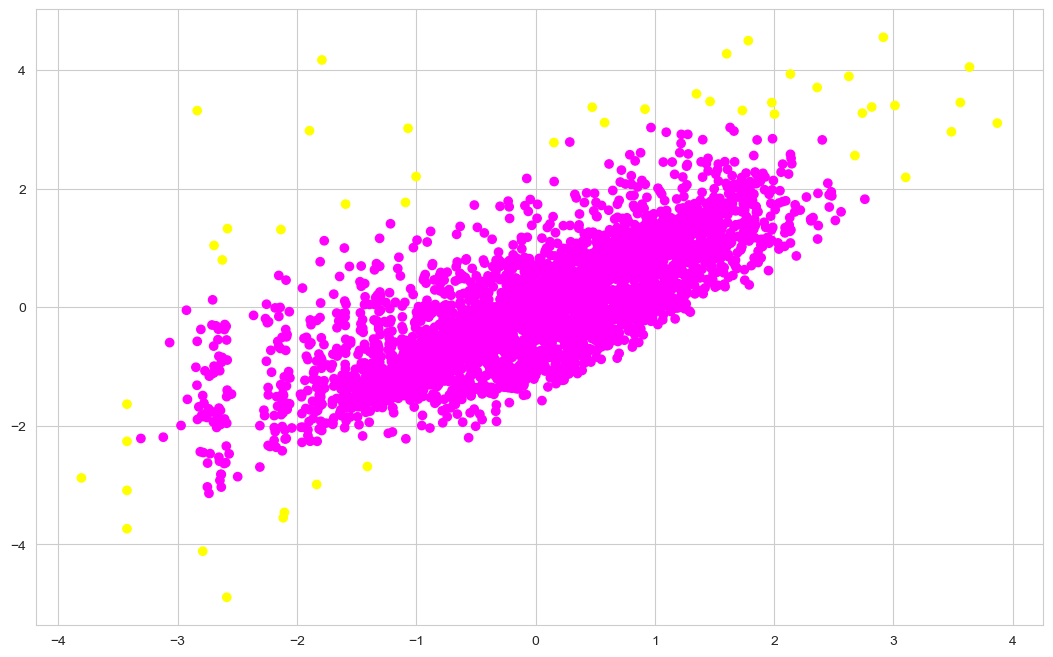

In [88]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

♦ ***Here we can see that, Customers are separated when we cluster them by Frequency_discount and Monetary_discount.***

## **Applying silhouette Score Method on Frequecy and Monetary**

In [92]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47827294807239146
For n_clusters = 3, silhouette score is 0.407400185453352
For n_clusters = 4, silhouette score is 0.37170641124299625
For n_clusters = 5, silhouette score is 0.34482583884048607
For n_clusters = 6, silhouette score is 0.36062074195697236
For n_clusters = 7, silhouette score is 0.3433892405102467
For n_clusters = 8, silhouette score is 0.35012646707324047
For n_clusters = 9, silhouette score is 0.3467569020094503
For n_clusters = 10, silhouette score is 0.36023299414919885
For n_clusters = 11, silhouette score is 0.36819690812322897
For n_clusters = 12, silhouette score is 0.3543580330720085
For n_clusters = 13, silhouette score is 0.3605299739909187
For n_clusters = 14, silhouette score is 0.36659612658281854
For n_clusters = 15, silhouette score is 0.3582540836789449


## **Applying Elbow Method on Frequency and Monetary**

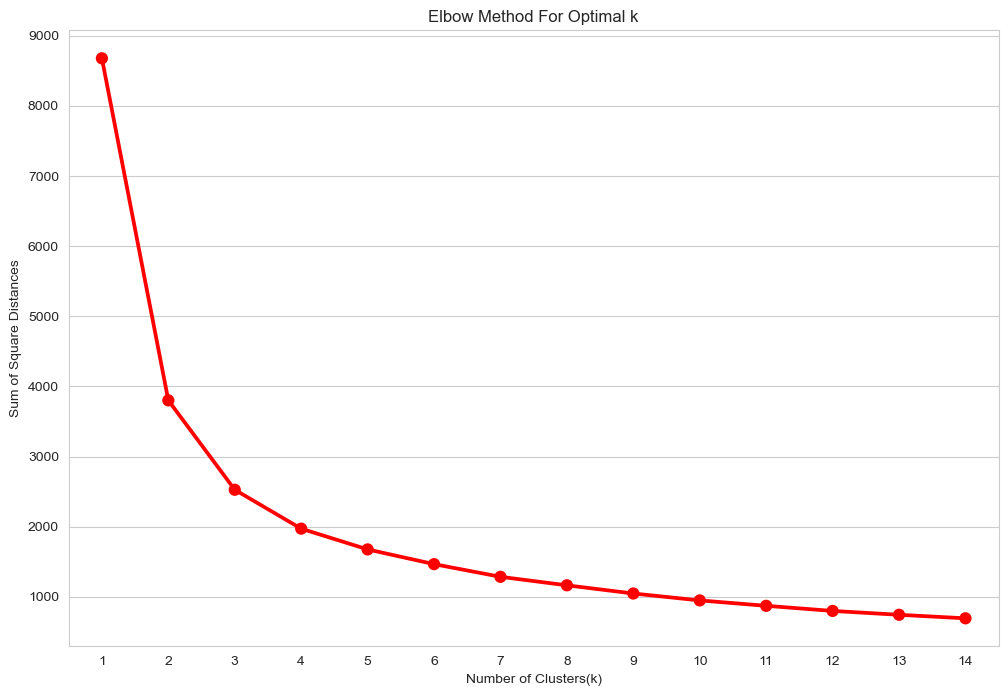

In [93]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

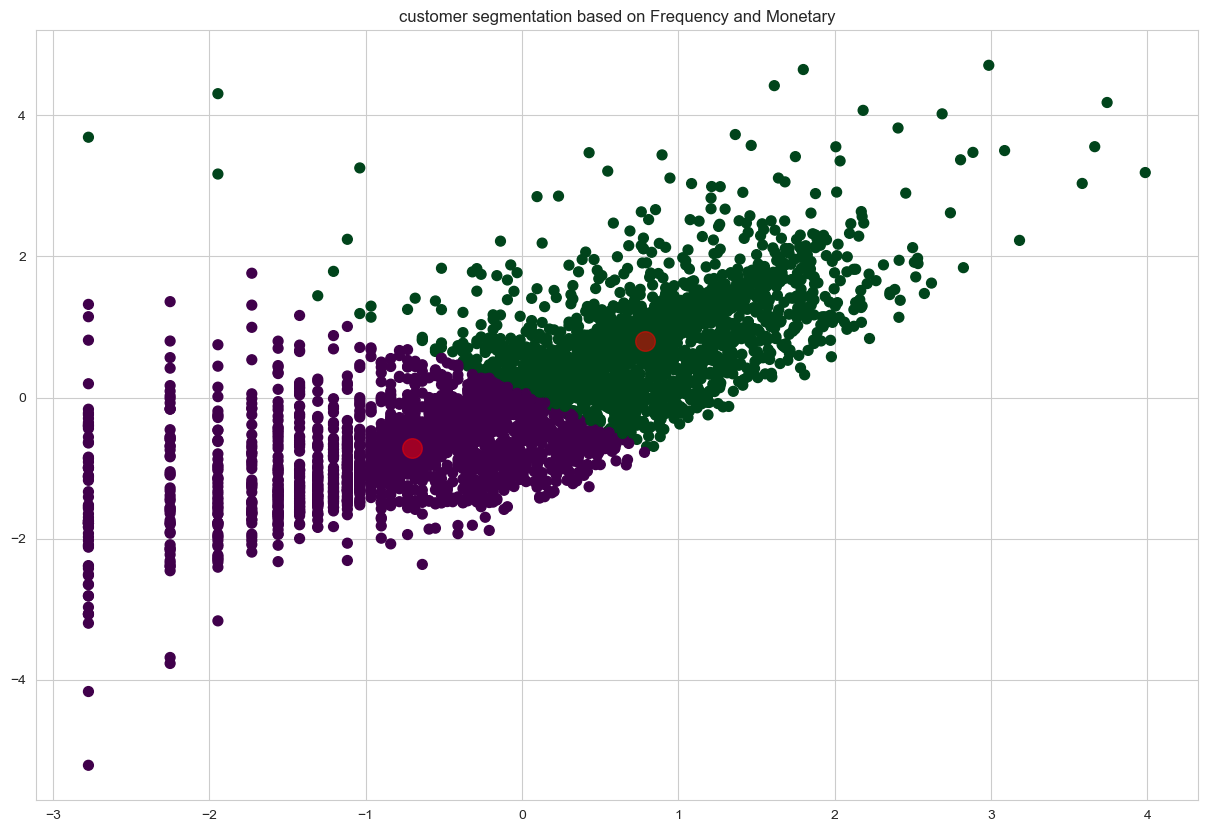

In [95]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.***

## **Applying DBSCAN to Method on Frquency and Monetary**

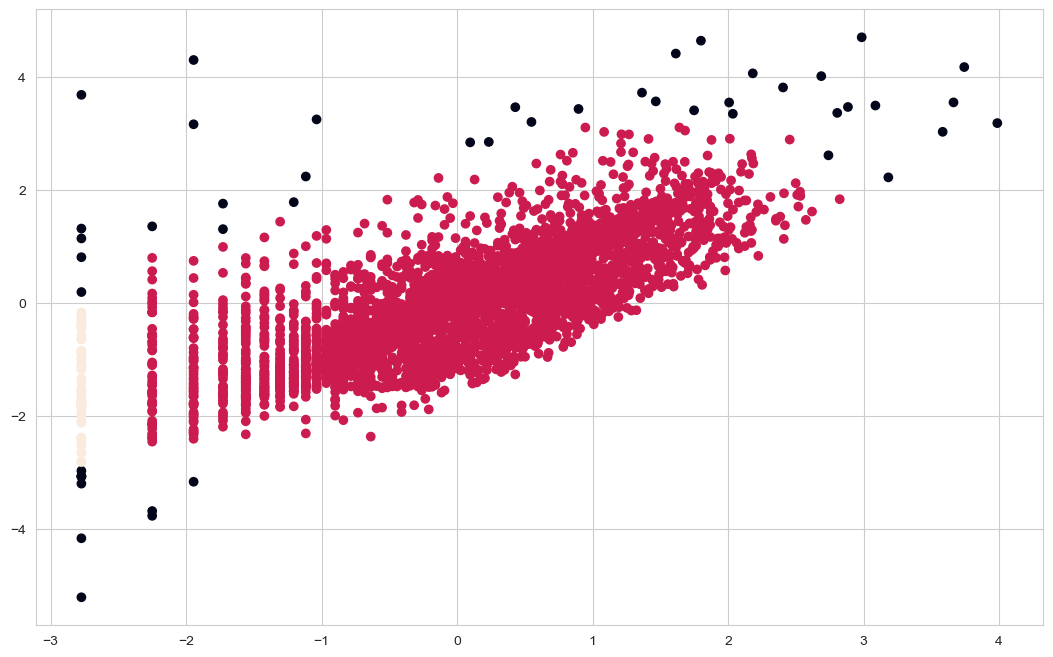

In [96]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

## **Applying Silhouette Method on Recency, Frequency and Monetary**

In [97]:
#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [98]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.3951770707909246
For n_clusters = 3 The average silhouette_score is : 0.3028168386903721
For n_clusters = 4 The average silhouette_score is : 0.3017123663809571
For n_clusters = 5 The average silhouette_score is : 0.2785661461874347
For n_clusters = 6 The average silhouette_score is : 0.27885758546690703
For n_clusters = 7 The average silhouette_score is : 0.26198642962742774
For n_clusters = 8 The average silhouette_score is : 0.26471675852789284
For n_clusters = 9 The average silhouette_score is : 0.2530153778663923
For n_clusters = 10 The average silhouette_score is : 0.2530579934556927


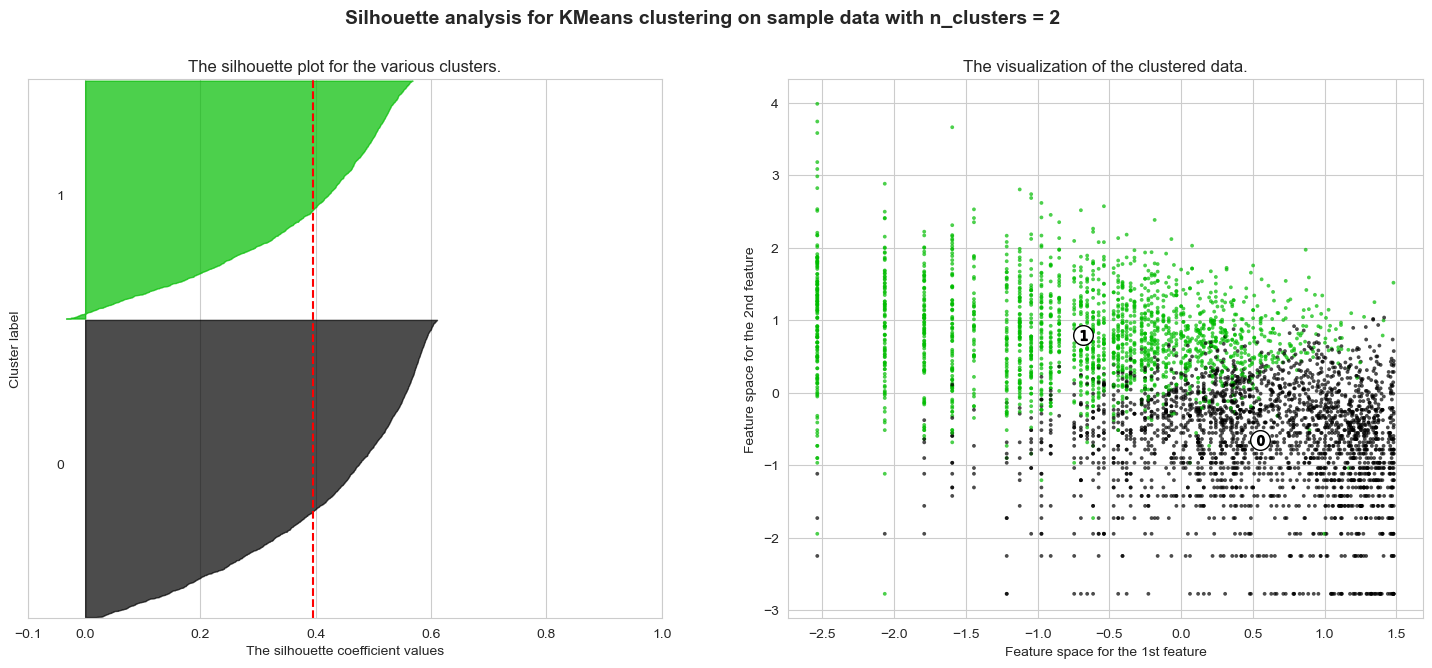

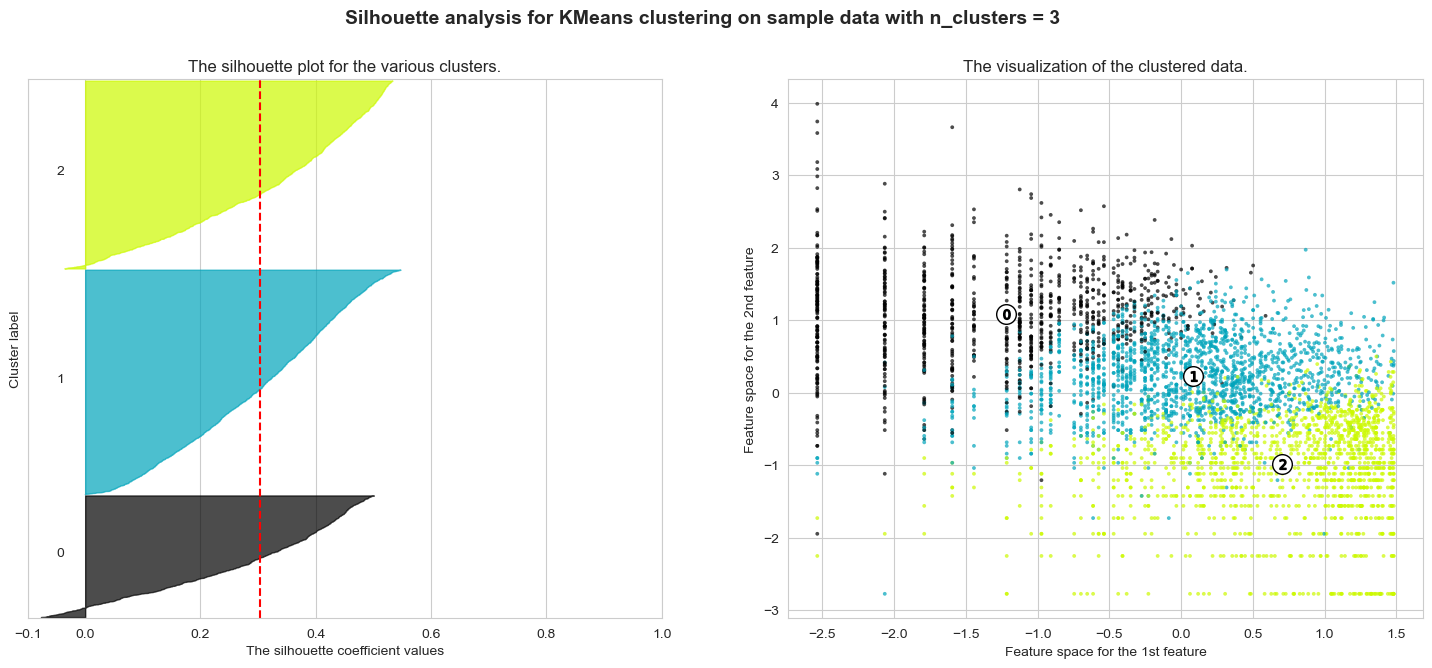

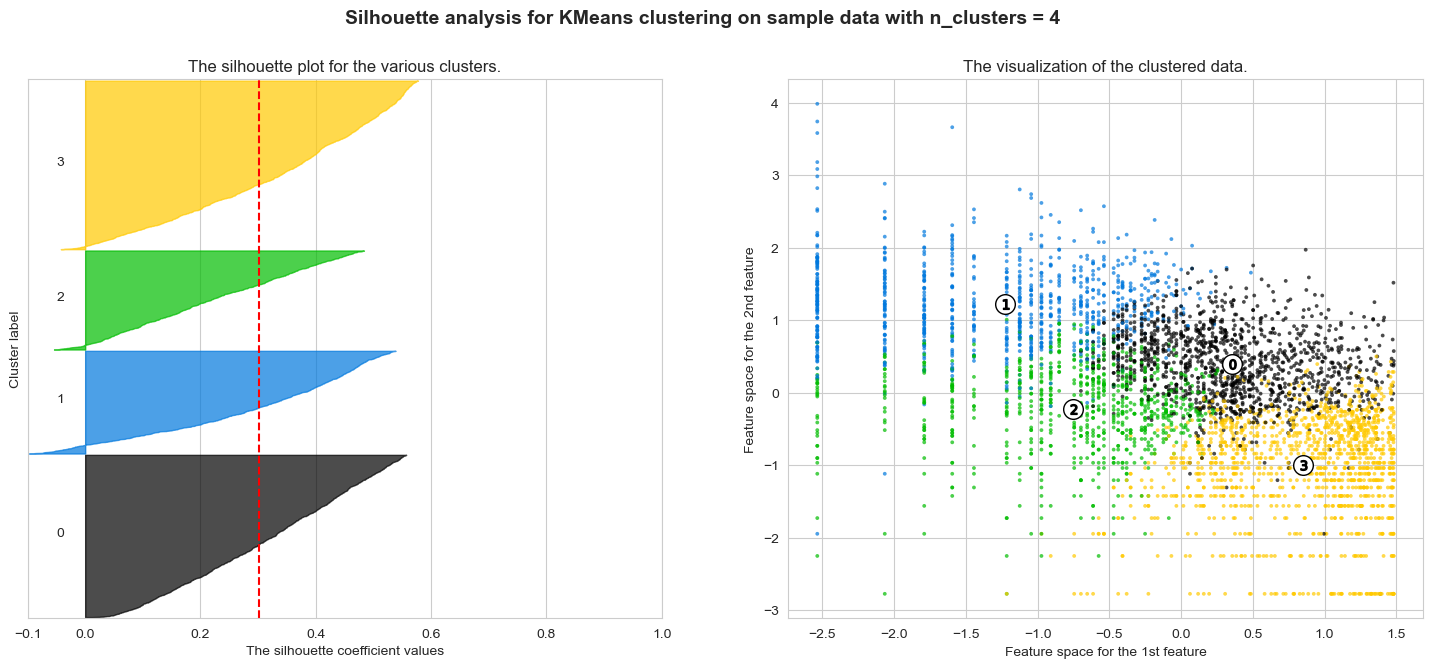

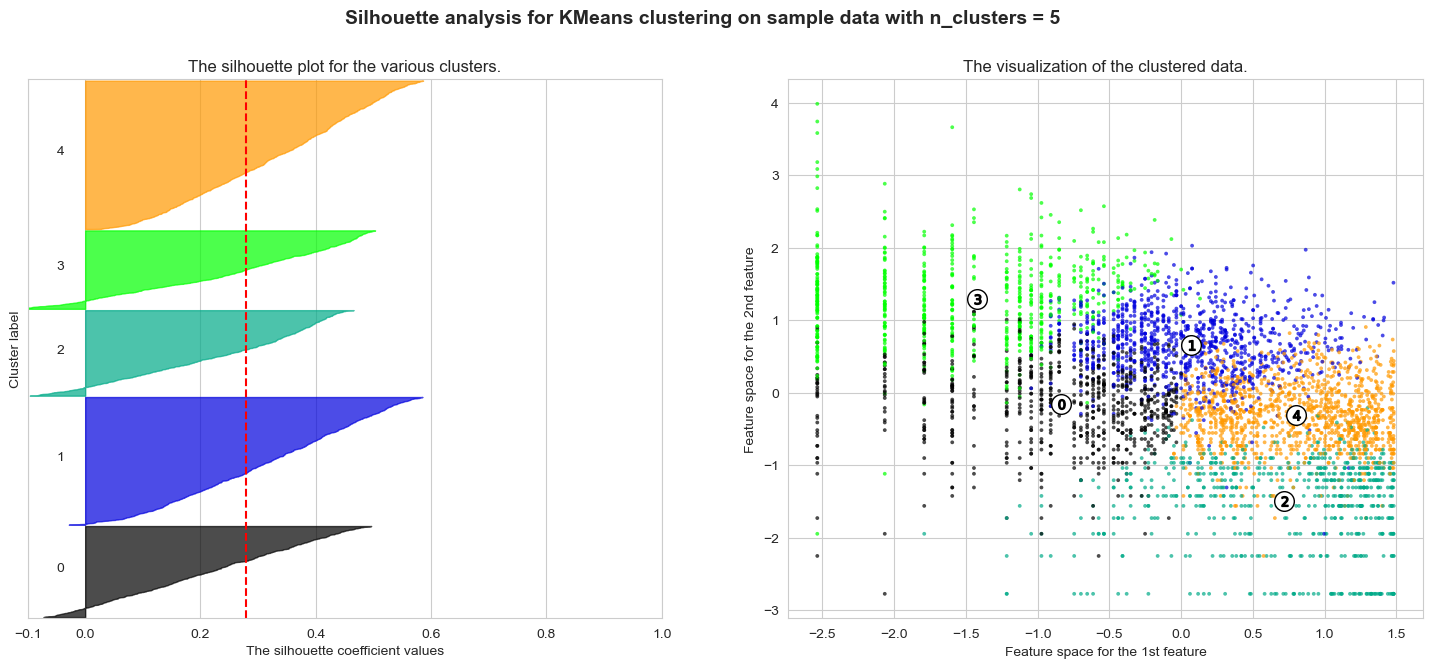

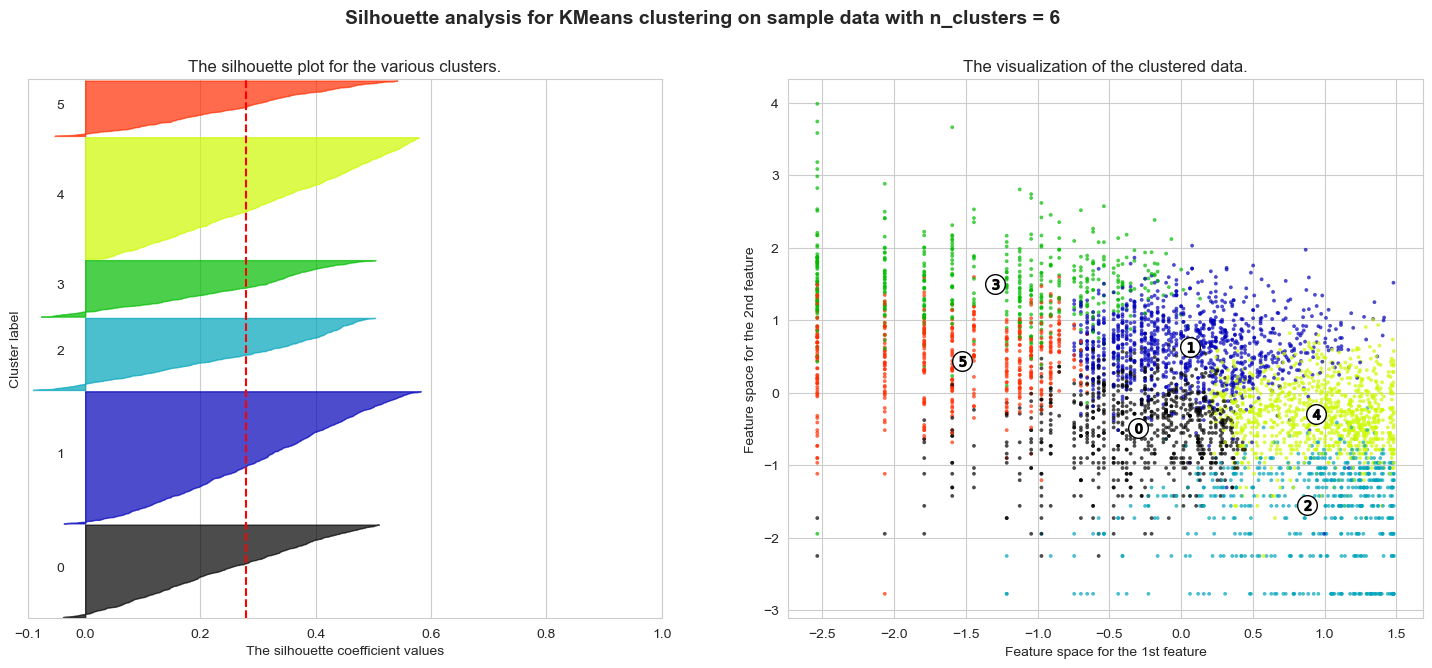

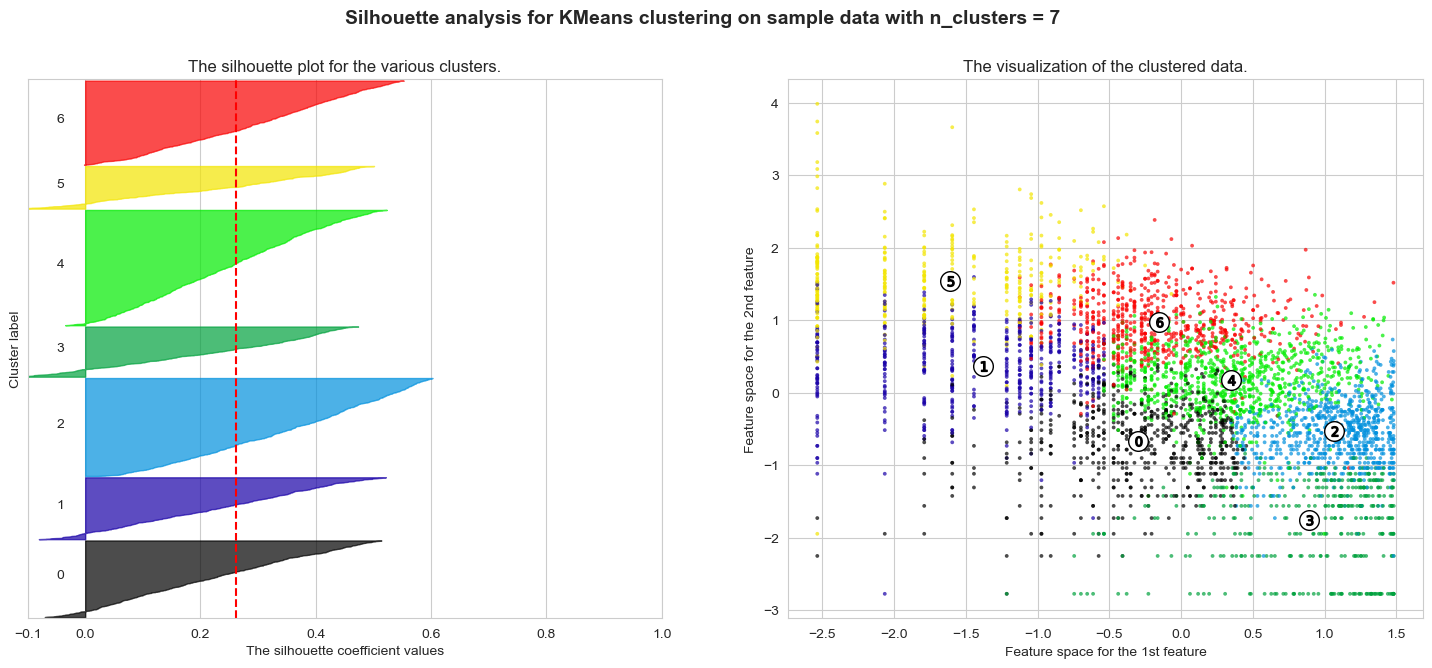

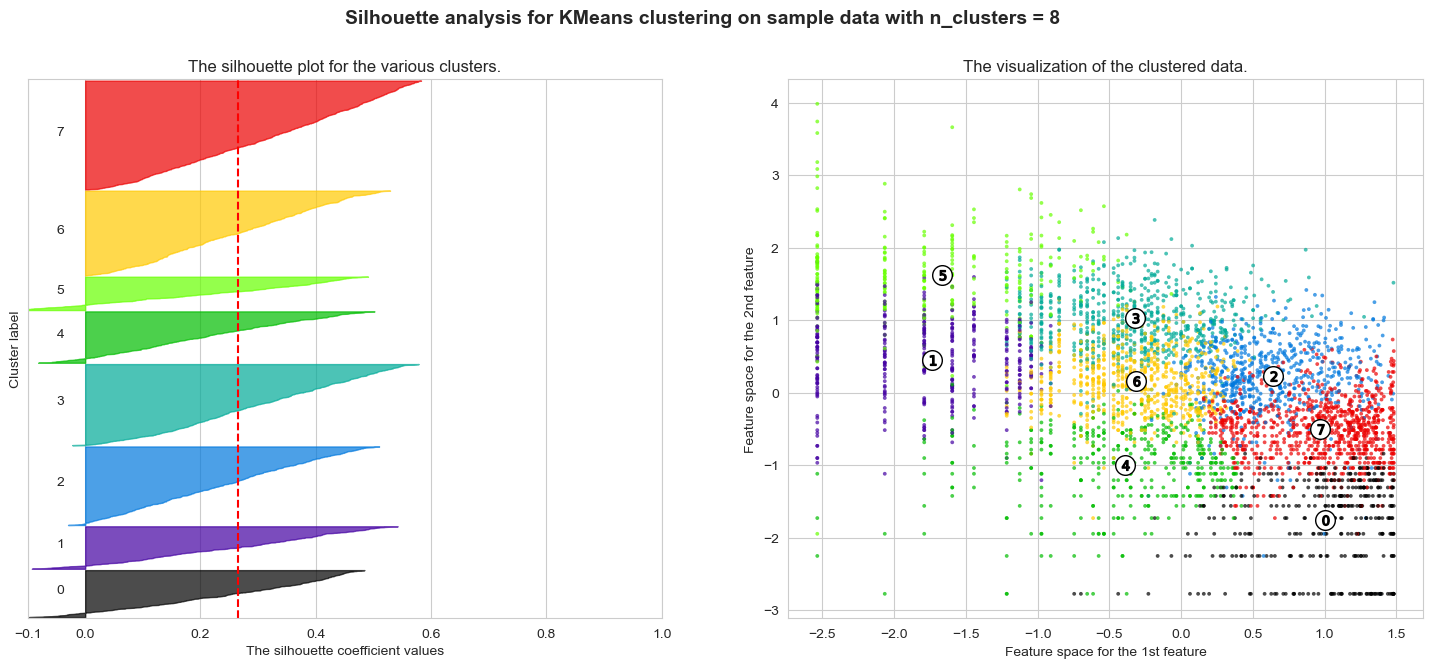

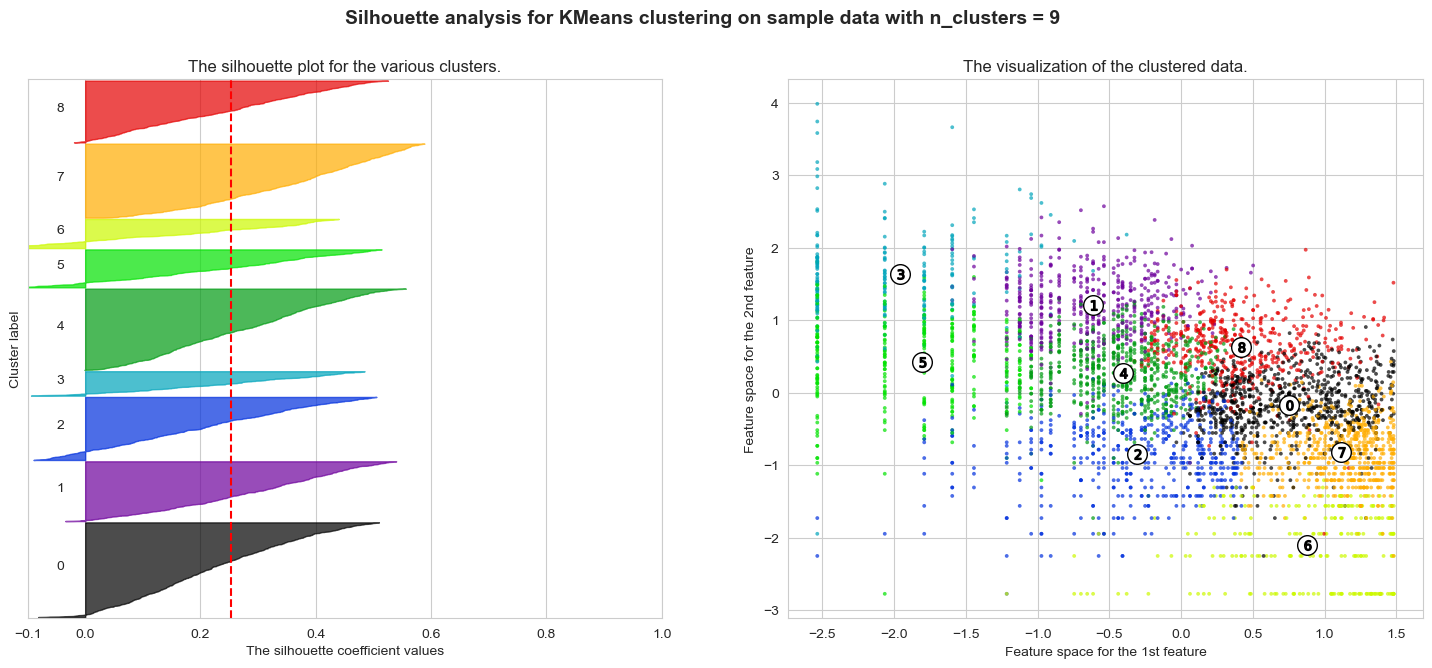

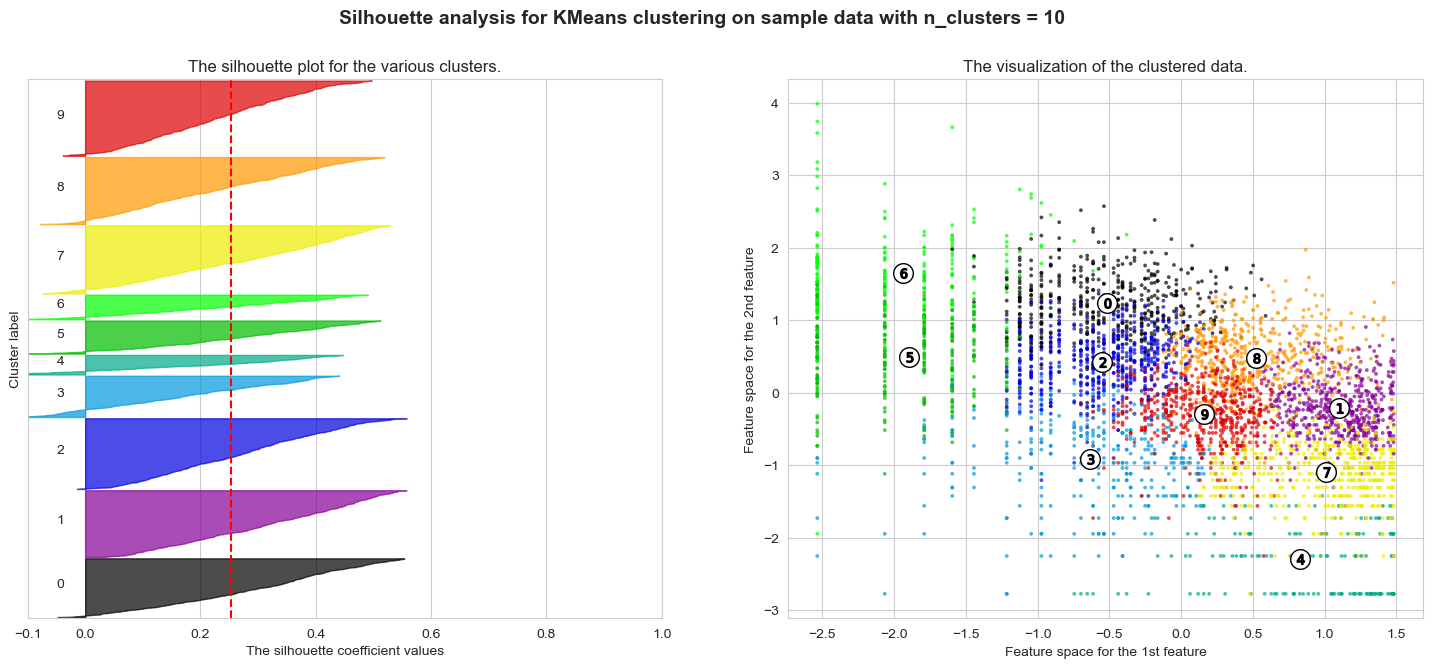

In [99]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

***From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

In [82]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

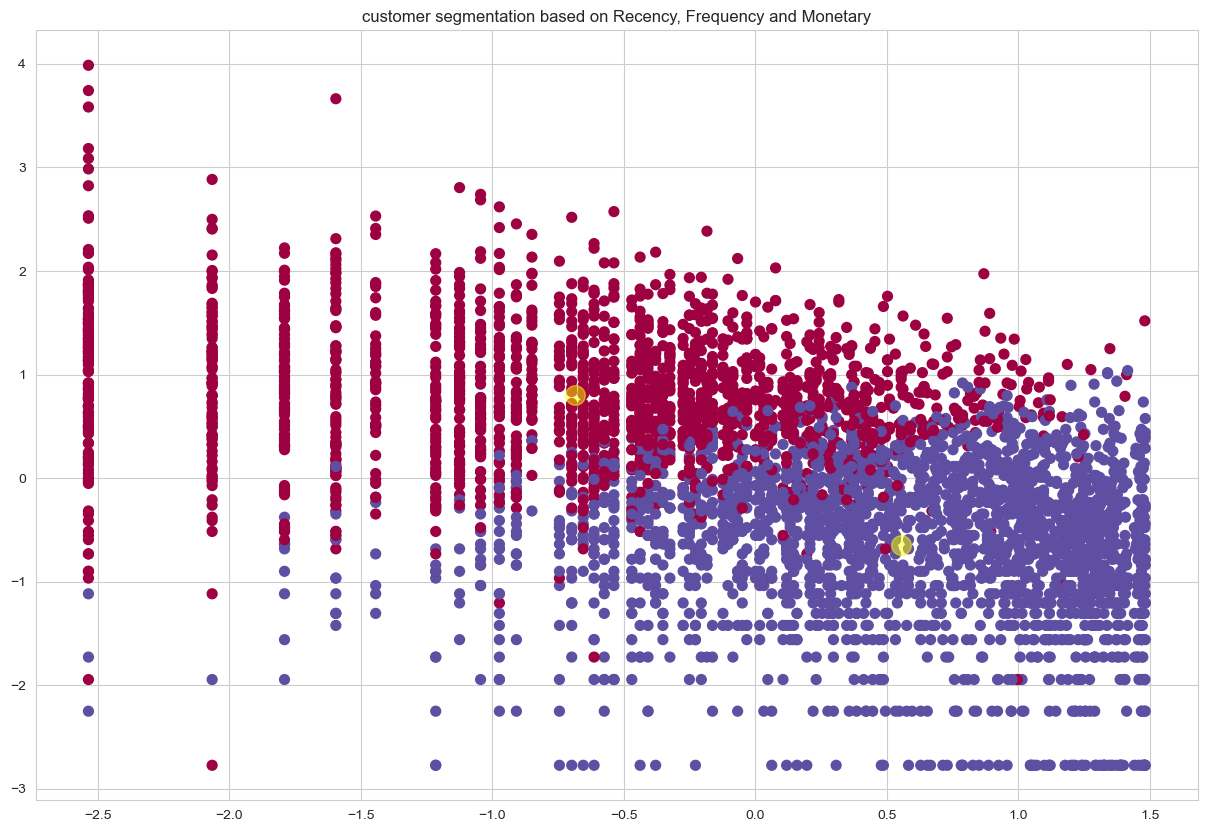

In [83]:
#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

 ***Here we can see that, Customers are  separated when we cluster them by Recency, Frequency and Monetary.***

## **Applying Elbow Method on Recency, Frequency and Monetary**

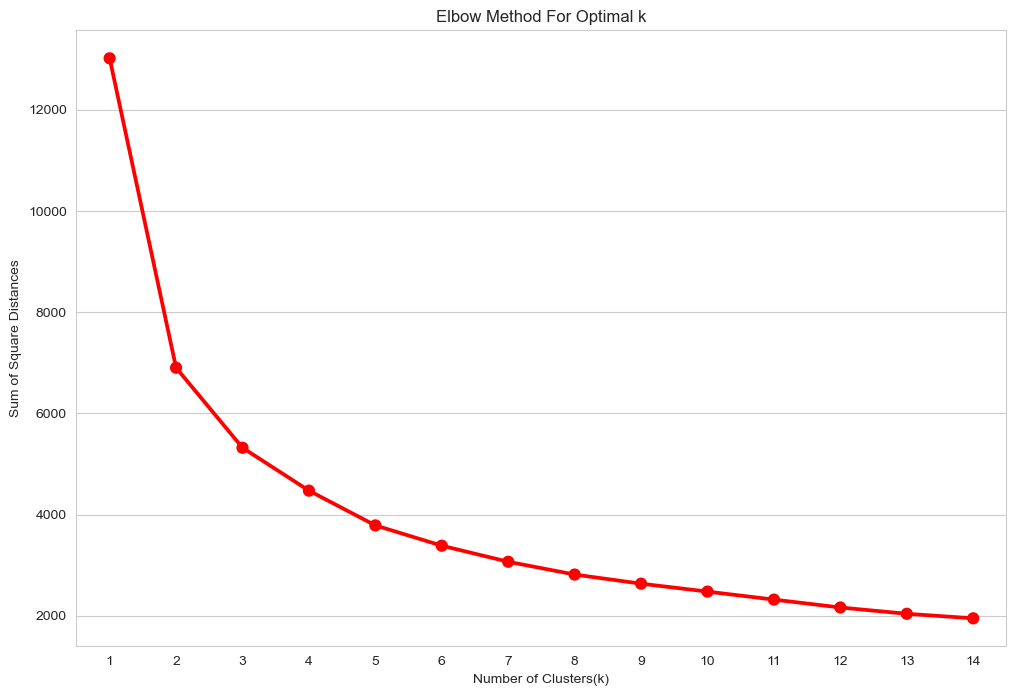

In [84]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

## **Applying DBSCAN to Recency, Frequency and Monetary**

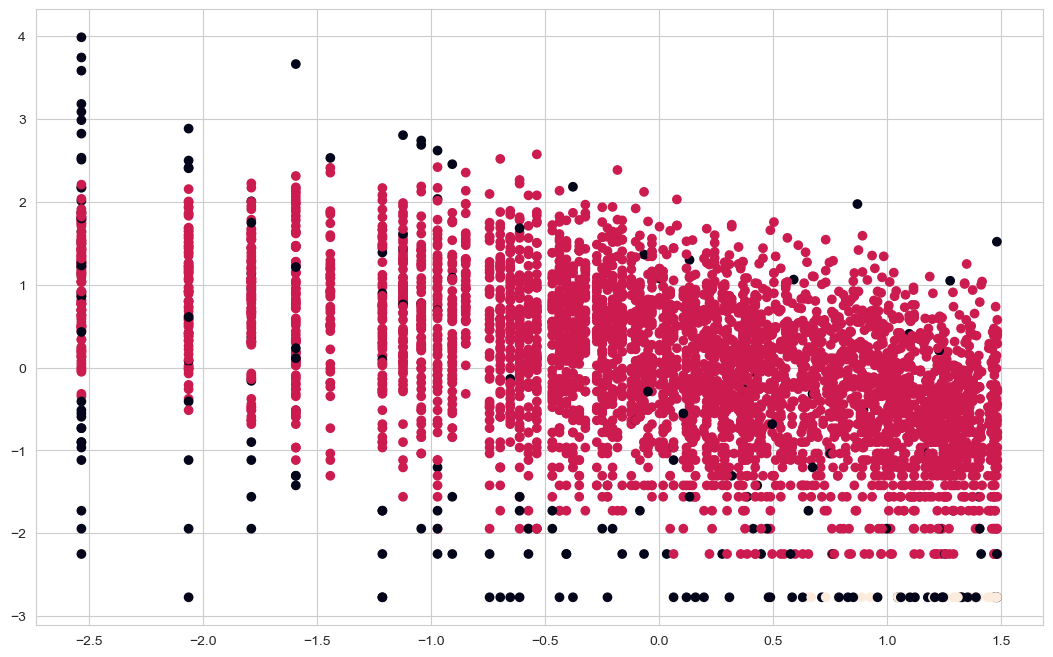

In [85]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

***Here we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3.***

In [86]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        0  
12347.0        0.693147       5.204007      8.368693        1  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.442651      7.826459        1  
12353.0        5.318120       1.386294      4.488636        0  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1

In [87]:
#checking customer belongs to cluter 1
rfm_df[rfm_df['Cluster'] ==1]

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12347.0           2        182   4310.00  1  1  1      111         3   
12349.0          18         73   1757.55  2  2  1      221         5   
12352.0          36         85   2506.04  2  2  1      221         5   
12356.0          22         59   2811.43  2  2  1      221         5   
12357.0          33        131   6207.67  2  1  1      211         4   
...             ...        ...       ... .. .. ..      ...       ...   
18260.0         172        134   2643.20  4  1  1      411         6   
18263.0          25         61   1213.16  2  2  2      222         6   
18272.0           2        166   3078.58  1  1  1      111         3   
18283.0           3        756   2094.88  1  1  1      111         3   
18287.0          42         70   1837.28  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12347.0        0.693147       5.204007      8.368693        1  
12349.0        2.890372       4.290459      7.471676        1  
12352.0        3.583519       4.442651      7.826459        1  
12356.0        3.091042       4.077537      7.941449        1  
12357.0        3.496508       4.875197      8.733541        1  
...                 ...            ...           ...      ...  
18260.0        5.147494       4.897840      7.879746        1  
18263.0        3.218876       4.110874      7.100984        1  
18272.0        0.693147       5.111988      8.032224        1  
18283.0        1.098612       6.628041      7.647252        1  
18287.0        3.737670       4.248495      7.516041        1  

[1922 rows x 12 columns]

## **Hierarchical clustering**

**Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.**

### **Dendogram**

**A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.**

## **Dendogram to find the optimal number of clusters**

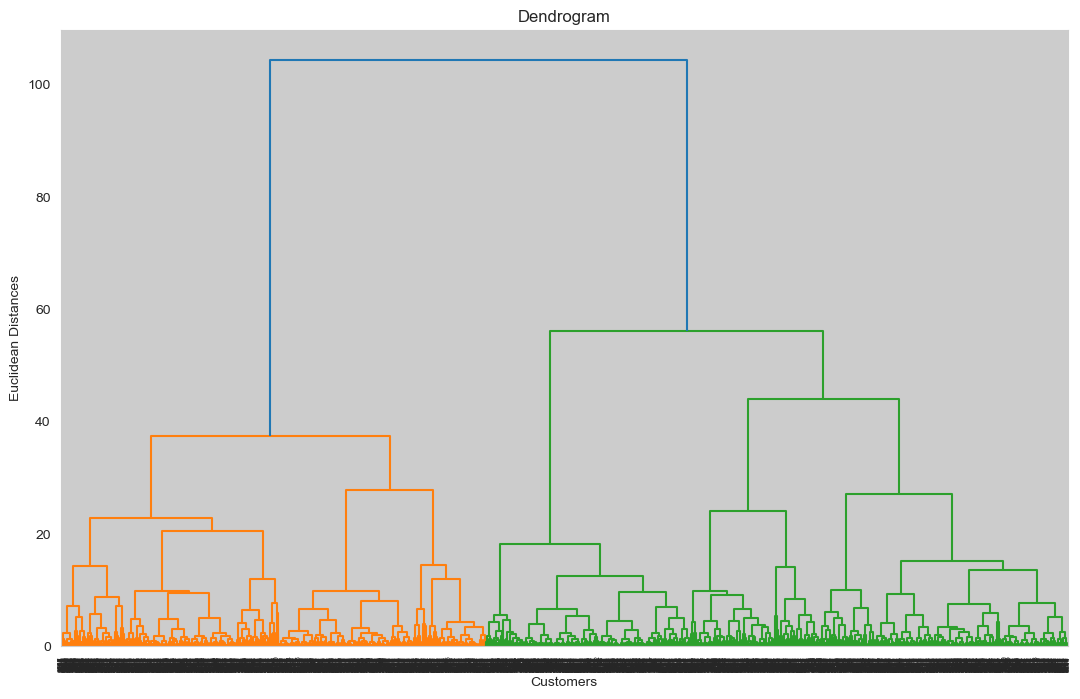

In [88]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 



### **Here, we can see No. of Clusters = 2**

In [89]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

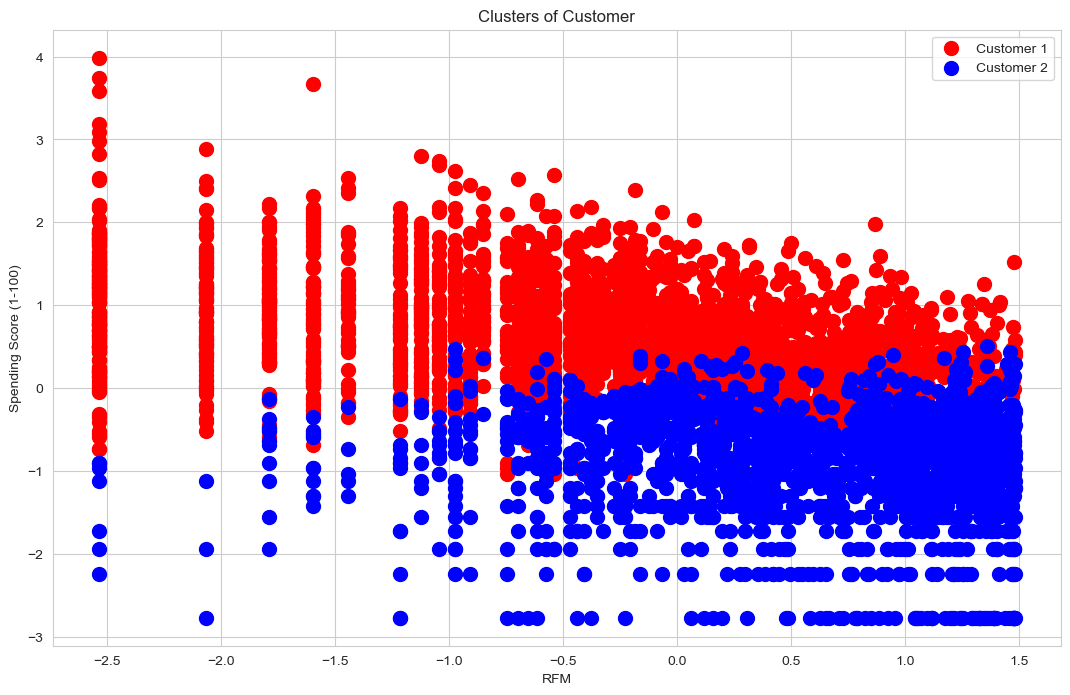

In [90]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [91]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})


Recency   Frequency     Monetary
Cluster                                     
0        140.707902   24.936285   470.838838
1         30.859521  175.677940  4044.428425

**We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.**

# **Summary**

In [92]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

# **Conclusion**





*   ***This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.*** 




*   ***Using  a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters  and got a silhoutte score of 0.39 for two clusters***





*  ***By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.*** 

*   ***The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.***

